# Investigating the Causes of a High Unemployment Rate in South Africa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <u>Executive Summary</u>

The purpose of this investigation is to determine the leading socioeconomic factors influencing the unemployment rate in South Africa, and analyse the relationship them. We construct 4 models from different sectors to assist us in this investigation, the features of which are extracted from the health, economic, and infrastructure sectors, with the fourth model consisting of a combination of these. All the models, with selected features, were found to be representative of the unemployment rate, with the combined model exhibiting the best results. Some limitations of this investigation include the amount of data used, validation sources for confirming our initial data, and more comprehensive modeling and analysis techniques to be explored.

## <u>Introduction</u>

Ever-present high unemployment rates are engrained in the history of South Africa, and have received wide media coverage and research due to its vast implications on all facets of South Africa [(News Article)](https://www.gcis.gov.za/content/resourcecentre/newsletters/insight/issue13#). Currently, South Africa is facing an issue where the unemployment rate of its labour force is slowly increasing. This is a huge issue as more and more South Africans are struggling to find jobs which is leading to a larger part of the population without an income, further increasing the number of South Africans in poverty. Previous studies indicate that the education level of job seekers contributes towards the high unemployment rate. This is because most employment opportunities require atleast a Matric Certificate making it difficult for a large portion of job seekers which do not have any qualification to find employment.

In this project we will investigate other possible socio-ecoonomic factors that may contribute to the high unemployment rate in South Africa. We wish to establish any existing relationships between these factors and the high unemployment rate and also establish whether the different factors are dependent/independent of each other. At the end of the investigation we will be able to answer the following.
<br>

### <u>Research Question</u>
- What are the leading socioeconomic factors influencing the unemployment rate in South Africa?
- Can the unemployment rate be modelled using economic factors in South Africa?
- Can the unemployment rate be modelled using health factors in South Africa?
- Can the unemployment rate be modelled using infrastructure factors in South Africa?
- Which socioeconomic sector best models the unemployment rate in South Africa?

### <u>Hypotheses</u>
- Socioeconomic factors such as school enrolment, GDP, Inflation, Imports and Exports of goods and primary resources, Labour Force, and Government Expenditure on Education influence the unemployment rate in South Africa.
- The unemployment rate in South Africa can be modelled solely using economic factors.
- The unemployment rate in South Africa can be modelled solely using health factors.
- The unemployment rate in South Africa can be modelled solely using infrastructure factors.
- The infrastructure sector will best model the unemployment rate in South Africa.

### <u>Contents Overview</u>

In this section, an introduction to this project was provided, summarizing a background from which the research questions were generated, and the hypotheses formulated. In the subsequent sections, we provide a description of the data that is used in the modelling process and its various attributes. We then give an outline of the methodology followed in order to generate the models in an attempt to answer the research questions. The preprocessing of data follows in which we alter the structure of the data so that it is easier to use in the following sections. Exploratory data analysis is performed in which we visualise the data in various ways to gain knowledge about the variables we are considering in our models. We now fit our various initial models and perform hypothesis testing. This is done to analyse the considered variables in the model. Once the final models have been fitted and predictions have been made on in-sample and out-of-sample data, we analyse and interpret the results. We conclude with answers to our research questions and summarize some shortcomings of this research and further extensions for future research.

## <u>Data Description</u>
In order to perform this invstigation a dataset adapted from [(Download Here)](https://data.humdata.org/dataset/c479e754-3b38-4d8b-a6f8-e6562cdc90e9/resource/392e66e7-f092-43a4-bb0c-28dd95ac083e/download/indicators_zaf.csv) will be used. 
<!-- This dataset was compiled in ... . It consist of data from x countries about several socio-economic factors collected from 1960 to 2020. It was intended to be used for .... -->
<!-- The size of the dataset is 77604 rows x 6 columns. -->
A brief description of the different fields present in the data is shown in the table below 

| Variable Name | Type | Description |
| ---    | --- | --- |
| Country Name | String | Gives the name of the country |
| Country ISO3 | String | Codes for the representation of names of countries and their subdivisions.
| Year | int | The year the data was recorded|
| Indicator Name | String | The name of the features or variables|
| Indicator Code | int |  The code used to referrence the feature/varaible|
|Value | float | Give the value of the features| float|

The initial size of the dataset was 77604 rows x 6 columns. Since the data only contains information from South Africa, we removed the country name, the country ISO3, and the indicator code as they are unnecessary and redundant for the purpose of our investigation, thus reducing the number of columns in our dataset to 3. Then, given that the initial dataset contains 3902 unique indicator names, we used a correlation matrix to extract 25 relevant indicators in an attempt to answer the research question, thus leaving us with 427 rows. 

The data is collected by the Humanitarian Data Exchange every month, this particular dataset was downloaded by us on the 28th of March 2021 to assist us in our investigation.

To validate our data, we compared this to similar datasets that was compiled by the World Bank and IMF.[(See Here)](https://knoema.com/atlas/South-Africa/Unemployment-rate?action=export&gadget=indicator-preview-host)

The quality of data used is crucial in assessing whether it will be able to assist us in answering our research questions. We first assess the accuracy and reliability of the data. The accuracy of our data is limited by the methods used to collect the data, however the data is from a reputable data collection source and conforms to what would be expected. The reliability of this confirmed through finding data from another trusted source to confirm the accuracy of our data, and is shown in the exploratory plots and analysis section. Next, we assess the completeness of the data. The dataset provided a lot of instances, however fewer recordings were made prior to 1980. We handle this as part of our data cleaning and only consider instances after 1980 for our model, as there is still a sufficient amount of data points to build representative models. The data is naturally relevant to our posed research questions, and the features extracted will help us form meaningful answers. The data is collected and updated monthly by the Humanitarian Data Exchange, and was collected by us in March, thus ensuring the data is up-to-date and can be used for answering our question in real time. Therefore our data sufficiently assumes the five necessary traits for good quality data, and in conjunction with our implemented methodology, can be used to answer our research questions.


<!-- Given the size of the whole dataset, the number of unique indicators, and our methodology to extract the features affecting the change in unemployment, the data is very useful and will be able to answer our research question. -->

## <u>Methodology</u>
1. Load, clean and wrangle data : <br>
- Extract initial dataset from .csv
- Drop the unecassary and redundant variables as discussed in our Data Description.
- Change the remaining variables to the appropriate data types.
- Set index to be the year of recording, to form Time-Series data.
- Determine and Fill Missing values in Columns with Mean.
- Pivot the data to make it easier to work with, as well as make each indicator name value a column itself, to finalise the format of Time-Series data.
 <br>

2. Exploratory plots and analysis :
- Now that the data has been cleaned, we utilize the describe function to investigate some of the basic summary statistics of our cleaned data.
- Use a Correlation Matrix to extract the relationship between our features affecting the unemployment rate, and the unemployment rate.
- Line Plots of all of our potential features vs time, as well as the unemployment rate itself and its change over time.
- Use scatter plots to verify and visualise the relationship seen in the correlation vector, between the factors affecting the unemployment rate, and the unemployement rate itself.

3. Model Fitting & Hypothesis testing:<br>

In trying to analyse the relationship between the explanatory variables and the response variable, we assume a linear relationship and thus use linear regression as a modelling technique.
For each of our 4 models for answering our research questions, we:
- test for collinearity, and remove variables with a high collinearity.
- split dataset into training and testing datasets.
- using the statsmodels package, we are able to fit an initial model and analyse its diagnostics using the summary method.
- build and use a combination function to assess all possible combinations of explanatory variables and fit an improved model.
- perform outlier detection and remove any outliers.
- fit an improved model to this and perform hypothesis testing using the various diagnostics and tests provided by the summary method in the statsmodels package. We determine the significant explanatory variables for best describing our response, as well asdiscuss and justify the results.
- build final improved model and perform in- and out-of-sample predictions, and test set analysis.

4. Interpretation of Results
- we interpret the various diagnostics in relation to our models.
- we interpret the results of our models.
- we interpret our model results vs initially expected results.
- we answer our research questions based on the results from the model fitting and hypothesis testing section.

5. Conclusion
- we conclude by answering the research questions, highlighting some shortcomings, and discuss possibilities for future work.

## <u>1.) Data Cleaning</u>

##### Extract initial dataset from .csv, and drop the unnecessary and redundant variables as discussed in our Data Description

In [2]:
df_indicators = pd.read_csv('indicators_zaf.csv', header=0)
#display(df_indicators.head())

df_indicators.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1,inplace = True)
#display(df_indicators.head())

##### Change the remaining variables to the appropriate type, and set index to be the year of recording, to form Time-Series data.

In [3]:
df_indicators['Value'] = df_indicators['Value'].astype(float)
df_indicators['Year'] = pd.to_datetime(df_indicators['Year'],format = '%Y', errors='ignore')
df_indicators.index = df_indicators['Year']
df_indicators.drop(['Year'],axis=1, inplace=True)

# uncomment to view data type change
#print('Index datatype:')
#print(df_indicators.index.dtype, '\n')
#print('df_indicators info:')
#display(df_indicators.info())

##### We pivot the data to make it easier to work with, as well as make each indicator name value a column itself. To finalise the format of Time-Series data, we create a dataframe that contains the relevant features for our investigation, on which we later in the notebook fill in the missing values using a relevant filling technique. Then, we create a copy of df_clean for other purposes, to prevent us from affecting the cleaned, filled-in data.

In [4]:
df_pivot = df_indicators.pivot_table(values='Value', index=df_indicators.index, columns = 'Indicator Name')
#display(df_pivot.head())

df_clean_v2 = df_pivot[['Unemployment, total (% of total labor force) (national estimate)',
                        'Current education expenditure, total (% of total expenditure in public institutions)',
                        'Imports of goods, services and primary income (BoP, current US$)','Exports of goods and services (BoP, current US$)',
                        'School enrollment, primary (% gross)','Inflation, consumer prices (annual %)',
                        'Government expenditure on education, total (% of government expenditure)','Labor force, total',
                        'New businesses registered (number)','Access to electricity (% of population)',
                       'Rural population growth (annual %)','Population growth (annual %)','Urban population growth (annual %)',
                       'Agricultural land (% of land area)','Arable land (% of land area)','Adolescent fertility rate (births per 1,000 women ages 15-19)',
                       'School enrollment, primary and secondary (gross), gender parity index (GPI)','Prevalence of HIV, total (% of population ages 15-49)',
                       'Life expectancy at birth, total (years)','Survival to age 65, female (% of cohort)','Survival to age 65, male (% of cohort)',
                       'Short-term debt (% of total reserves)','Total reserves (includes gold, current US$)','Current account balance (% of GDP)',
                       'GDP growth (annual %)']]
df_scatter = df_clean_v2.copy()
df_clean_v2.head()

Indicator Name,"Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","School enrollment, primary (% gross)","Inflation, consumer prices (annual %)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number),Access to electricity (% of population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Short-term debt (% of total reserves),"Total reserves (includes gold, current US$)",Current account balance (% of GDP),GDP growth (annual %)
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,NaN,NaN,2.256799e+09,2.238599e+09,NaN,1.288878,NaN,NaN,NaN,NaN,...,79.2902,NaN,NaN,48.406,46.791759,36.183889,NaN,272204000.0,0.646831,NaN
1961-01-01,NaN,NaN,2.134999e+09,2.337999e+09,NaN,2.102343,NaN,NaN,NaN,NaN,...,80.5886,NaN,NaN,48.777,47.258431,36.659105,NaN,394839500.0,3.388938,3.844751
1962-01-01,NaN,NaN,2.153199e+09,2.498999e+09,NaN,1.246290,NaN,NaN,NaN,NaN,...,81.8870,NaN,NaN,49.142,47.725103,37.134321,NaN,647247500.0,5.057661,6.177883
1963-01-01,NaN,NaN,2.571799e+09,2.696399e+09,NaN,1.337968,NaN,NaN,NaN,NaN,...,83.2388,NaN,NaN,49.509,48.253298,37.695298,NaN,774940000.0,2.065072,7.373613
1964-01-01,NaN,NaN,3.106599e+09,2.846199e+09,NaN,2.534980,NaN,NaN,NaN,NaN,...,84.5906,NaN,NaN,49.888,48.781493,38.256276,NaN,706829200.0,-1.551957,7.939782


##### Here we determine the number of rows in the dataframe with missing values

In [5]:
nrows_missing = df_clean_v2.shape[0] - df_clean_v2.dropna().shape[0]
df_missing = pd.Series(df_clean_v2.isnull().sum())
print('Number of rows with missing data:', nrows_missing,'\n')
display(df_missing)

Number of rows with missing data: 56 



Indicator Name
Unemployment, total (% of total labor force) (national estimate)                        39
Current education expenditure, total (% of total expenditure in public institutions)    50
Imports of goods, services and primary income (BoP, current US$)                         1
Exports of goods and services (BoP, current US$)                                         1
School enrollment, primary (% gross)                                                    24
Inflation, consumer prices (annual %)                                                    1
Government expenditure on education, total (% of government expenditure)                46
Labor force, total                                                                      30
New businesses registered (number)                                                      50
Access to electricity (% of population)                                                 38
Rural population growth (annual %)                                         

##### From the number of rows missing in each column, it can be seen that multiple only have one row with missing values. Upon investigation, we found that one feature had a recording for the year 2020, while the others did not. For that reason we drop the last row, the year 2020.

In [6]:
df_clean_v2 = df_clean_v2.iloc[:-1,:]
nrows_missing = df_clean_v2.shape[0] - df_clean_v2.dropna().shape[0]
df_missing = pd.Series(df_clean_v2.isnull().sum())
print('Number of rows with missing data:', nrows_missing,'\n')
display(df_missing)

Number of rows with missing data: 55 



Indicator Name
Unemployment, total (% of total labor force) (national estimate)                        38
Current education expenditure, total (% of total expenditure in public institutions)    49
Imports of goods, services and primary income (BoP, current US$)                         0
Exports of goods and services (BoP, current US$)                                         0
School enrollment, primary (% gross)                                                    23
Inflation, consumer prices (annual %)                                                    0
Government expenditure on education, total (% of government expenditure)                45
Labor force, total                                                                      30
New businesses registered (number)                                                      49
Access to electricity (% of population)                                                 37
Rural population growth (annual %)                                         

##### Fill in missing values with mean

In [7]:
ind = df_clean_v2.columns
for i in ind:
    df_clean_v2[i] = df_clean_v2[i].fillna(df_clean_v2[i].mean())
    
df_clean_v2.head()

Indicator Name,"Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","School enrollment, primary (% gross)","Inflation, consumer prices (annual %)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number),Access to electricity (% of population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Short-term debt (% of total reserves),"Total reserves (includes gold, current US$)",Current account balance (% of GDP),GDP growth (annual %)
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,26.978637,95.311564,2.256799e+09,2.238599e+09,100.30584,1.288878,18.939744,1.783213e+07,270518.272727,79.055589,...,79.2902,1.013252,13.383333,48.406,46.791759,36.183889,111.709938,272204000.0,0.646831,2.940889
1961-01-01,26.978637,95.311564,2.134999e+09,2.337999e+09,100.30584,2.102343,18.939744,1.783213e+07,270518.272727,79.055589,...,80.5886,1.013252,13.383333,48.777,47.258431,36.659105,111.709938,394839500.0,3.388938,3.844751
1962-01-01,26.978637,95.311564,2.153199e+09,2.498999e+09,100.30584,1.246290,18.939744,1.783213e+07,270518.272727,79.055589,...,81.8870,1.013252,13.383333,49.142,47.725103,37.134321,111.709938,647247500.0,5.057661,6.177883
1963-01-01,26.978637,95.311564,2.571799e+09,2.696399e+09,100.30584,1.337968,18.939744,1.783213e+07,270518.272727,79.055589,...,83.2388,1.013252,13.383333,49.509,48.253298,37.695298,111.709938,774940000.0,2.065072,7.373613
1964-01-01,26.978637,95.311564,3.106599e+09,2.846199e+09,100.30584,2.534980,18.939744,1.783213e+07,270518.272727,79.055589,...,84.5906,1.013252,13.383333,49.888,48.781493,38.256276,111.709938,706829200.0,-1.551957,7.939782


## <u>2.) Exploratory Data Analysis</u>

In this section we aim to use statistical methods and plots to make inferences about the possible causes of a high unemployement rate in South Africa. The features chosen to be explored in this section were selected based on research into causes of a high unemployment rate, influenced by the paper by W.T.Bangane[1999]. We chose 25 relevant features to exhaustively analyse the correlation between possible features and the unemployment rate, in an attempt to choose the best features for our investigation. 

We make use of the describe function to determine central tendencies about the chosen features, to examine underlying patterns and distributions. To visually examine these distributions we utilize boxplots, to visualize the spread and any outliers within each feature, however outliers are only removed in the modelling section. Now that an understanding has been formulated we use a Correlation Matrix to highlight any linear relationships between the variables.

##### Now that the data has been cleaned, we utilize the describe() function to investigate some of the basic summary statistics of our cleaned data

In [8]:
display(df_clean_v2.describe())
display(df_clean_v2.info())

Indicator Name,"Unemployment, total (% of total labor force) (national estimate)","Current education expenditure, total (% of total expenditure in public institutions)","Imports of goods, services and primary income (BoP, current US$)","Exports of goods and services (BoP, current US$)","School enrollment, primary (% gross)","Inflation, consumer prices (annual %)","Government expenditure on education, total (% of government expenditure)","Labor force, total",New businesses registered (number),Access to electricity (% of population),...,"Adolescent fertility rate (births per 1,000 women ages 15-19)","School enrollment, primary and secondary (gross), gender parity index (GPI)","Prevalence of HIV, total (% of population ages 15-49)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Short-term debt (% of total reserves),"Total reserves (includes gold, current US$)",Current account balance (% of GDP),GDP growth (annual %)
count,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000
mean,26.978637,95.311564,4.455567e+10,3.991953e+10,100.305840,7.903920,18.939744,1.783213e+07,270518.272727,79.055589,...,85.905976,1.013252,13.383333,57.126034,56.812331,44.335858,111.709938,1.334058e+10,-1.290461,2.940889
std,1.718866,1.174686,4.499685e+10,3.814642e+10,7.227174,4.693604,0.436000,2.188570e+06,24286.104372,4.933469,...,15.010975,0.012521,4.434536,4.520720,7.206391,6.538190,58.798731,1.816352e+10,3.259943,2.414114
min,22.410000,87.187492,2.134999e+09,2.238599e+09,80.166557,-0.692030,17.906309,1.245477e+07,180877.000000,57.600000,...,65.751000,0.955310,0.700000,48.406000,46.391858,34.100958,42.122529,2.722040e+08,-7.318557,-2.137057
25%,26.978637,95.311564,1.189110e+10,9.957634e+09,100.305840,4.409521,18.939744,1.783213e+07,270518.272727,79.055589,...,70.332650,1.013252,13.383333,53.740000,50.234030,38.677009,79.068580,2.104219e+09,-3.702084,1.369264
50%,26.978637,95.311564,2.600285e+10,2.697917e+10,100.305840,6.510149,18.939744,1.783213e+07,270518.272727,79.055589,...,85.465488,1.013252,13.383333,57.135017,56.945520,44.306526,111.709938,3.621818e+09,-1.461479,3.027140
75%,26.978637,95.311564,6.939027e+10,6.084945e+10,104.918333,11.575891,18.939744,1.797354e+07,270518.272727,79.466692,...,99.408800,1.013252,16.025000,61.209250,62.931131,49.721155,111.709938,1.632080e+10,0.937755,4.558914
max,33.290001,97.872643,1.400000e+11,1.270000e+11,110.886971,18.654927,20.472050,2.332643e+07,376727.000000,91.229874,...,111.011000,1.051220,19.300000,63.857000,69.484458,55.053975,462.705392,5.505589e+10,5.763229,7.939782


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1960-01-01 to 2019-01-01
Data columns (total 25 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Unemployment, total (% of total labor force) (national estimate)                      60 non-null     float64
 1   Current education expenditure, total (% of total expenditure in public institutions)  60 non-null     float64
 2   Imports of goods, services and primary income (BoP, current US$)                      60 non-null     float64
 3   Exports of goods and services (BoP, current US$)                                      60 non-null     float64
 4   School enrollment, primary (% gross)                                                  60 non-null     float64
 5   Inflation, consumer prices (annual %)                              

None

##### Boxplots are used to visualise some of the basic summary statistics of each of the features

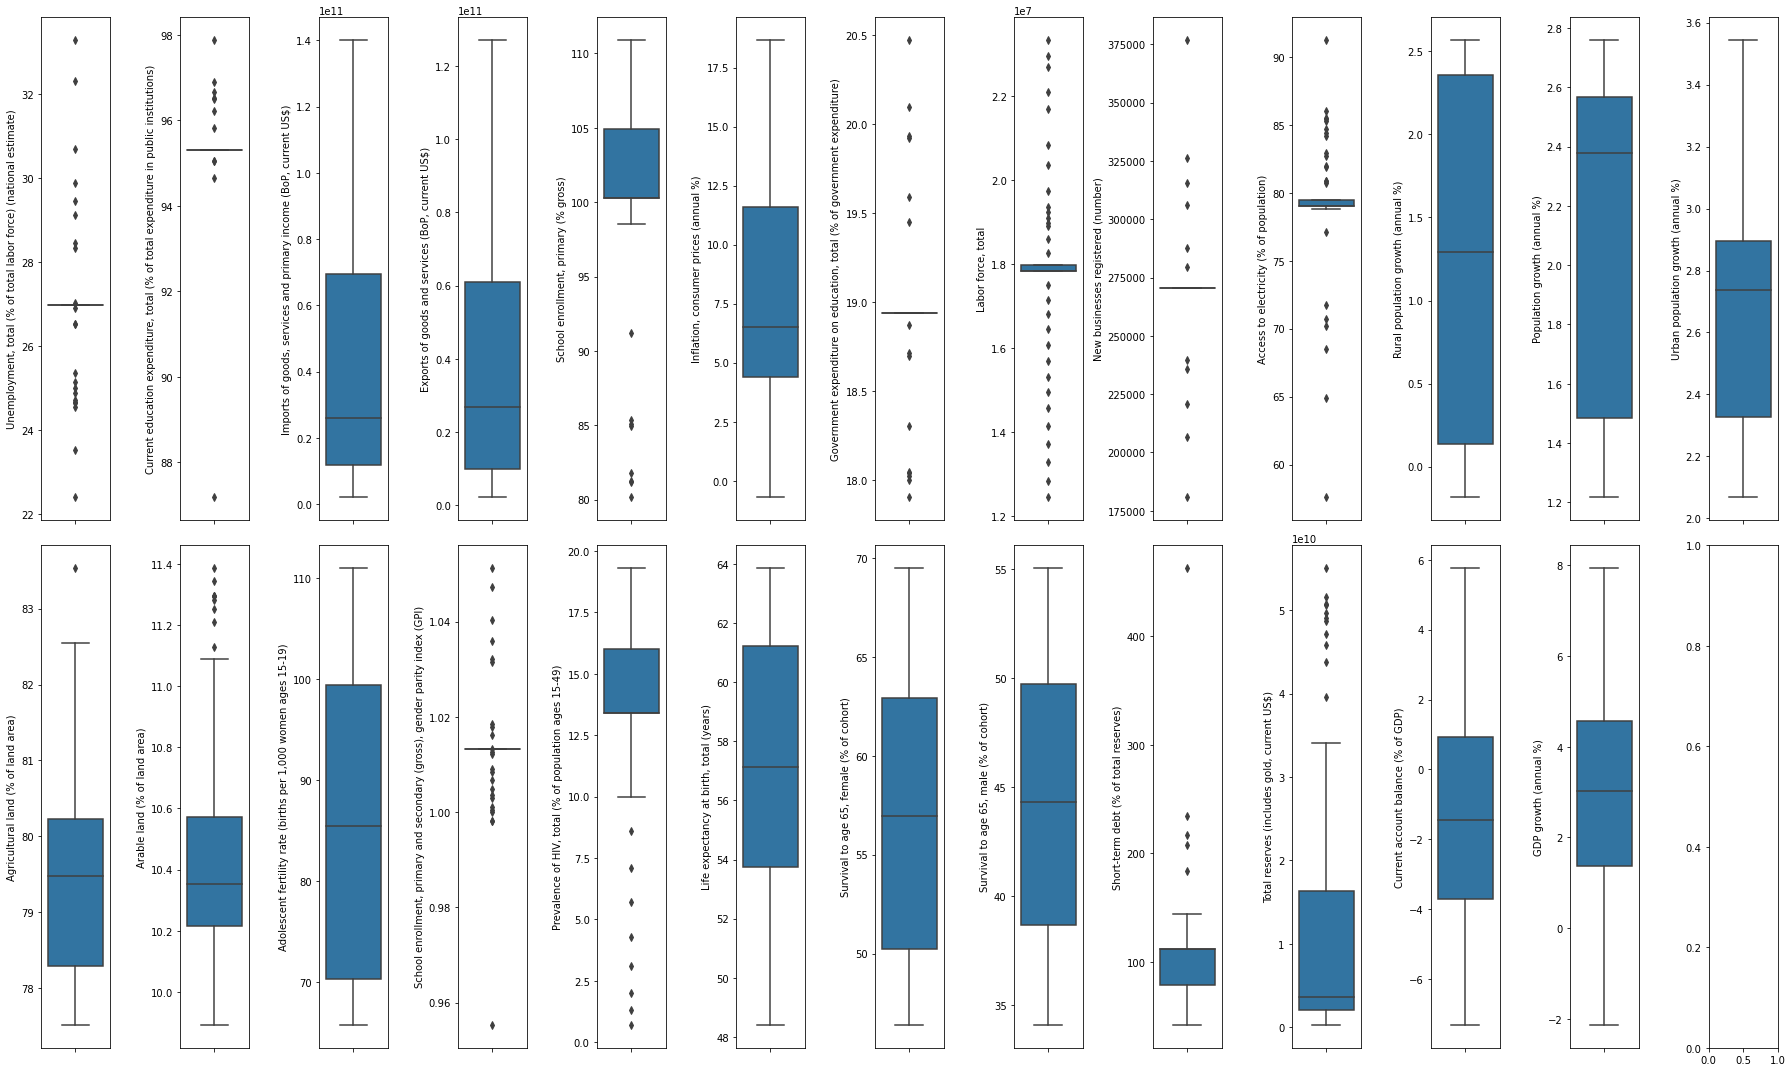

In [9]:
fig, axs = plt.subplots(2,13,figsize=(25,15))
count = 0
for j in range(2):
    for i in range(13):
        if(count>24):
            continue
        else:
            sns.boxplot(y=df_clean_v2[ind[count]],ax=axs[j,i])
            count+=1
fig.tight_layout()
plt.show()

### <u>Analysis of Central Tendencies</u>

The unemployment rate has fluctuated over the last 60 with a mean of about 26.5% of the total labour force in South Africa, with a minimum of just over 22%, and a a maximum of 29%. Interstingly, it can be seen that there has been very little variation in the education expenditure as a percentage of total expenditure in public institutions, as well as primary school enrolment as a percentage of gross. This little variation can be backed by the 25th percentile being far closer to the mean, as compared with the 75th percentile of the government expenditure on education.

##### Validation and Analysis through Line Plots

In [10]:
df_validate = pd.read_excel("Knoema_SA_Data.xlsx")
df_validate['Date'] = pd.to_datetime(df_validate['Date'],format = '%Y', errors='ignore')
df_validate.index = df_validate['Date']
df_validate.drop(['Date'],axis=1, inplace=True)

Index(['Unemployment Rate',
       'Education expenditure on Education (% Total, public institutions',
       'Imports', 'Exports', 'School Enrollment, Primary % growth',
       'Inflation Rate', 'Gov. Expenditure on Education, % of Gov Expenditure',
       'Labour Force, Total', 'New Business Registered, Number',
       'Access to Electricity', 'Rural Population Growth',
       'Population Growth Rate', 'Urban Population Growth',
       'Agricultural Land', 'Arable Land', 'Adolescent fertility',
       'school enrollment, primary and secondary', 'Prevalence HIV',
       'Life Expectancy at Birth', 'Survival to age 65 Female',
       'Survival to age 65 Male', 'Short-Term Debt', 'Total Reserves',
       'Current Account Balance', 'GDP (Billion $)'],
      dtype='object')


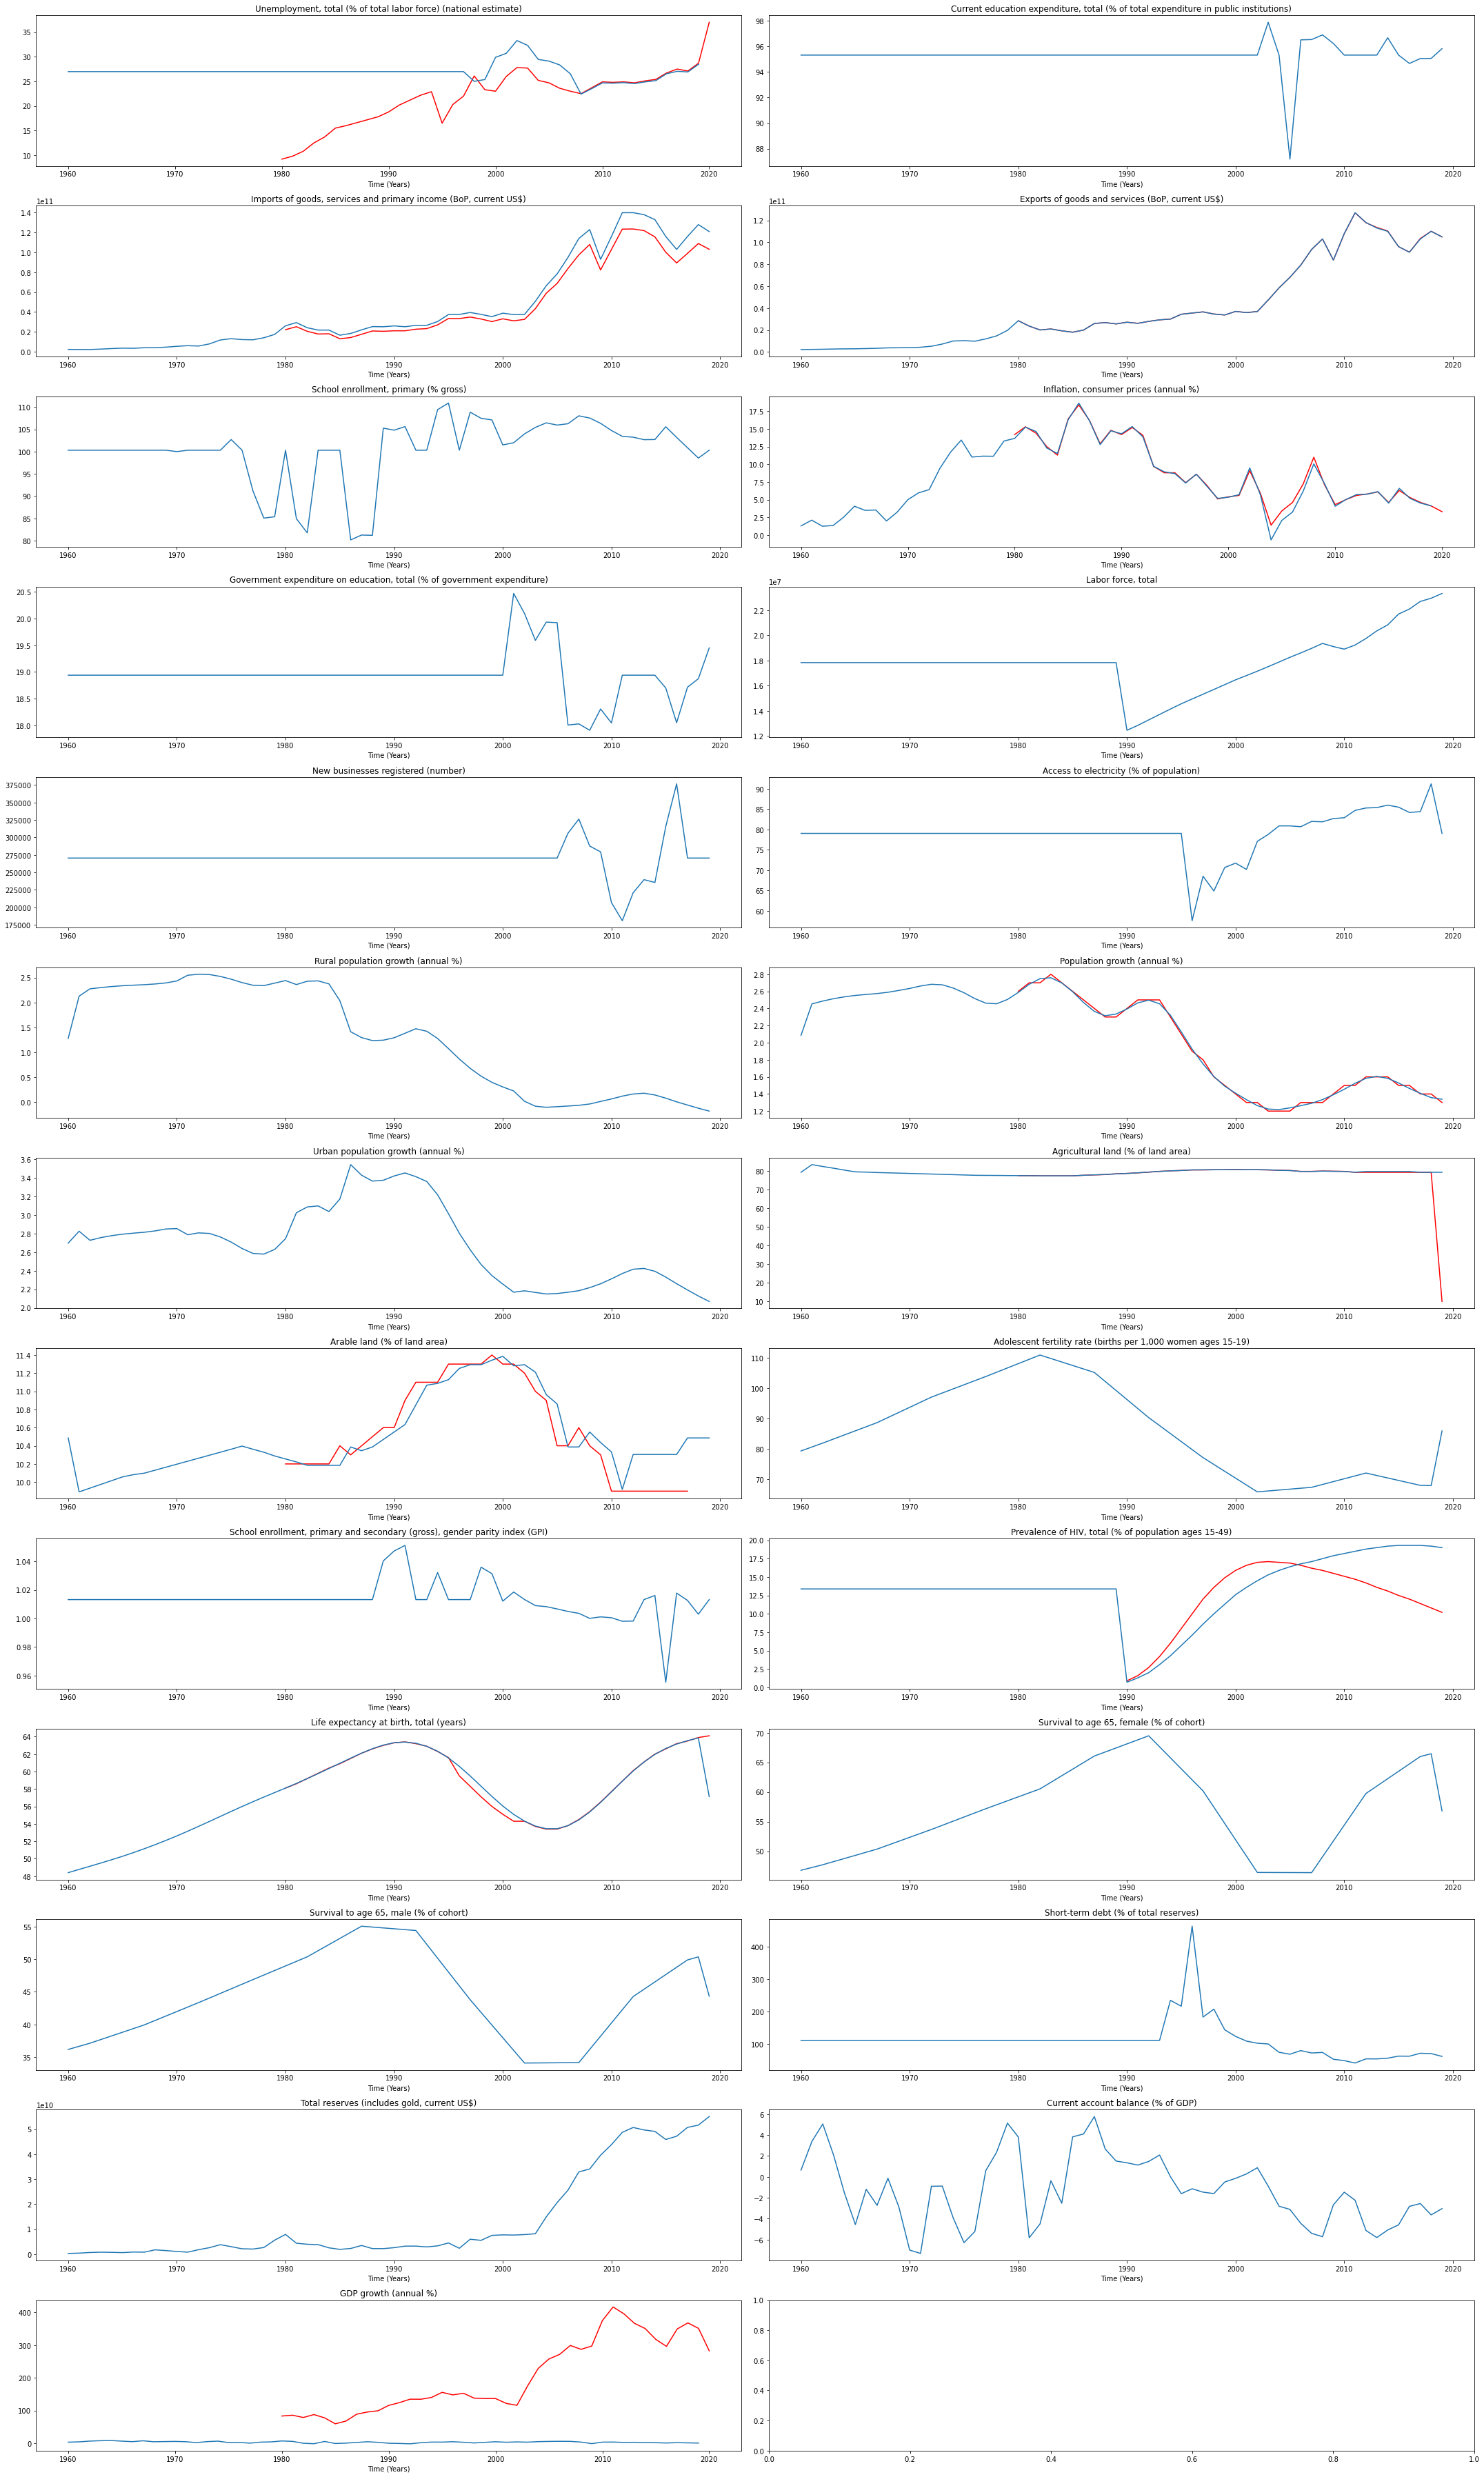

In [12]:
fig, axs = plt.subplots(13,2,figsize=(30,50))
count = 0
ind_val = df_validate.columns
for j in range(13):
    for i in range(2):
        if(count>24):
            continue
        else:
            axs[j, i].plot(df_validate.index,df_validate[ind_val[count]], color='red')
            
            axs[j, i].plot(df_clean_v2.index,df_clean_v2[ind[count]])
            axs[j, i].set_title(ind[count])
            axs[j, i].set_xlabel("Time (Years)")
            #axs[j, i].set_ylabel(ind[count])
            count+=1
    
fig.tight_layout()
plt.show()

### <u>Analysis of Line Plots</u>

Through the method of using the mean to fill missing values, it can be seen that 8 features that have a lot of years with missing values, mostly prior to the beginning of the data capturing. 
- Unemployment, total (% of total labor force) (national estimate) began being captured from 1998, 
- Current education expenditure, total (% of total expenditure in public institutions) began in 2001, 
- Government expenditure on education, total (% of government expenditure) began in 2000, 
- Labor force, total began in 1989, and
- New businesses registered (number) began in 2005
- Access to Electricity(% of population) began in 1994
- Prevalence of HIV(% of population age 15-49) began in 1990
- Short-Term Debt(% of total reserves) began in 1993<br>

A validation dataset was found from the external datasource [knoema.com](https://knoema.com/atlas/South-Africa/Unemployment-rate?action=export&gadget=indicator-) . As can be seen, the validation dataset is plotted in red, and confirms the accuracy of our intital dataset. We could not find external datasources to validate .... We have dropped data with data missing prior to 1990 that is unvalidated. This is one short-coming, and potential for future work could include finding more data from external sources.

##### Use a Correlation Matrix to understand the relationship between our features affecting the unemployment rate, and the unemployment rate. We however, do not use correlations to determine our indicators.

In [13]:
corr_matrix = df_clean_v2.corr()
display(corr_matrix.iloc[:,0])

Indicator Name
Unemployment, total (% of total labor force) (national estimate)                        1.000000
Current education expenditure, total (% of total expenditure in public institutions)   -0.124187
Imports of goods, services and primary income (BoP, current US$)                       -0.316453
Exports of goods and services (BoP, current US$)                                       -0.303447
School enrollment, primary (% gross)                                                   -0.044169
Inflation, consumer prices (annual %)                                                  -0.057680
Government expenditure on education, total (% of government expenditure)                0.694577
Labor force, total                                                                     -0.179051
New businesses registered (number)                                                      0.162761
Access to electricity (% of population)                                                -0.245645
Rural populatio

Through scatter plot, the correlation matrix values are visulaised and verified. Each feature was plotted against the unemployment rate, and the following had a negative linear dependence with the unemployment rate.
- The GDP (current US), 
- Current education expenditure, total (% of total expenditure in public institutions), 
- Imports of goods, services and primary income (BoP, current US), 
- Exports of goods and services (BoP, current US), 
- School enrollment, primary (% gross), 
- Inflation, consumer prices (annual %),  
- Labor force, total, Population, total
- Adolescent fertility rate (births per 1,000 women ages 15-19)
- Access to electricity (% of population) 
- Rural population growth (annual %)                                                    
- Population growth (annual %)                                                        
- Urban population growth (annual %)
- Prevalence of HIV, total (% of population ages 15-49)
- Life expectancy at birth, total (years)                                         
- Survival to age 65, female (% of cohort)                                          
- Survival to age 65, male (% of cohort) 
- Total reserves (includes gold, current US) 

Whereas the following had a positive linear dependence with unemployment rate.
- The New businesses registered (number), 
- Government expenditure on education, total (% of government expenditure)
- Current account balance (% of GDP)                                                
- GDP growth (annual %)
- Short-term debt (% of total reserves)
- School enrollment, primary and secondary (gross), gender parity index (GPI)
- Agricultural land (% of land area)                                                    
- Arable land (% of land area) 

This gives us more insight into how the indicators might affect the unemployment rate as their values are increased or decreased.

##### Due to the validation dataset for unemployment, we have decided to replace our initial unemployment data with the validation data. This is solely done, as it has more data and still verifies our initial dataset from 2008 onwards. Using actual data, instead of data that has been filled in from the mean, we expect it will give us more accurate results from an unbiased model.

In [14]:
df_clean_new = df_clean_v2.copy()
df_clean_new.head()
df_clean_new['Unemployment, total (% of total labor force) (national estimate)'] = df_validate['Unemployment Rate']
#df_clean_new['Unemployment, total (% of total labor force) (national estimate)'] = np.where(df_clean_new['Unemployment, total (% of total labor force) (national estimate)'] == 26.978637, df_validate['Unemployment Rate'], df_clean_new['Unemployment, total (% of total labor force) (national estimate)'])

##### Drop unvalidated data, with lots missing entries prior to 1990

In [15]:
df_clean_new.drop(df_clean_new.index[:20],inplace=True)
df_clean_new.drop(["Current education expenditure, total (% of total expenditure in public institutions)",
                                                 "Government expenditure on education, total (% of government expenditure)",
                                                 "Labor force, total",
                                                 "New businesses registered (number)"], axis = 1, inplace = True)

## <u>3.) Model Fitting and Hypothesis Testing</u>

In our investigation, we are trying to analyse the relationship between the response, the percentage of the population that is unemployed, and our chosen explanatory variables. We assume that the relationship between our explanatory variables and our response variable is linear, thus making linear regression a suitable technique to utilize. By describing the relationship in this way, we can attempt to find a model to describe the underlying distribution possibly generating our response data, from our explanatory variables.

In using multivariate linear regression model, we calculate the regression coefficients, which represent the relationship between our explanatory variables and our response variable. The variation in our response is however not completely described by our explanatory variables, there is generally an error involved due to sampling errors, as well as the omission of potentially key explanatory variables. This is essentially what we are trying to find, in order to minimize the error, and more fully represent the response variable.

Potential sampling errors from the collection of our data-set are that some features are a national estimate based off of a census, which is never perfect and could be over or under-estimated. Another sampling error could be due to improved technology in more recent years, resulting in more accurate results.

These errors are deemed responsible for the random variation in our response, not explained by our explanatory variables. This error term assumes a normal distribution for all points, which are also assumed to be independently and identically distributed. It is further assumed that our explanatory variables and the sampling errors are independent. Linear regression modeling is used to estimate the conditional mean of the response, given an explanatory variable. As will be shown below, our model may be deemed quite accurate as it explains a large portion of the variation in Y.

By having a distribution of our response, as well as being able to completely explain all its variation, we are able to use our linear regression model to make inferences about the unemployment. Through the use of the statsmodels package, we use the fit method to fit a model to our data, and achieves this by first deriving sampling distributions for our regression estimators, which then get used to construct confidence intervals on which a number of hypothesis test are performed and included when using the summary method provided by the package.

#### Methodology:
The general outline of the experimental methodology was alluded to in the introduction. Here a more specific methodology invoked in our modeling process is outlined. We implement four different models in line with our defined research questions. Our goal is to analyse the relationship between the unemployment rate and the potential factors affecting it. Thus 3 of our models analyse individually the explanatory variables from infrastructure, health, and economic features. Our fourth model includes features from all of these to assess whether a more complete model, from these different sectors, would better represent the change in the unemployment rate - as is to be assumed.
Initially, we use collinearity testing to investigate potential linear dependence between our explanatory variables, for our four models. The problem in having redundant variables is that their solutions are highly unstable. We determine the multivariate collinearity by analyzing the Variance inflation factor(VIF). The VIF is using the built in function, which runs auxiliary regressions of each predictor on the remaining ones. The $R^{2}$ is calculated for each, which is then used to determine the VIF for each explanatory variable. A high VIF indicates how much the variance of the coefficient estimator is inflated by. For each model, the subsequent highly collinear variables are removed. After this, each model is split into training and testing sets. 

With this initial pre-model processing completed, for each model, we build an initial model and display the associated diagnostics. Thereafter, in order to find the best combination of features, we use our combination function to iterate through all the possible combinations, while recording the highest Adjusted R-squared score. After it is finished executing, we determine the combination of explanatory variables that produced the best Adjusted R-squared value, and build an improved model.  

Next, we use a residual vs leverage plot, for each model, to visually detect any potential outliers still in the data. Thereafter we use the influence_plot method provided in the statsmodels package to verify these outliers. We use Cooks distance metric with a thresh-hold of 0.15 to confirm that what was seen visually, are actually outliers. These observations are removed from the data-set for improved accuracy.

Another model is built on the data with the removed outliers and collinear variables, on which hypothesis testing is conducted to determine the significant explanatory variables in our model, which will be used to construct our final model. In the hypothesis testing, we aim to determine the influence of each of the x variables on the y variable. We do this by using the training data as a sample to infer what is happening in the whole population. In order to confirm that the coefficients of each of the x variables are a true representation of the population, and not just from sampling variation, we have to perform some tests.

In our test, we have our null hypothesis which is:
- $H_0: \beta_i = 0$ where $\beta_i$ is the coefficient of the $x_i$ variable

And our alternative hypothesis which is:
- $H_1: \beta_i \neq 0$

From the model that is generated from statsmodels, the coefficients ($\beta_i$) of the x variables are divided by the standard error to achieve the t-statistic for each variable. This is because the sampling distribution of the t-statistic (also called the t-distribution) under the null hypothesis will have a mean of 0 because as the number of samples tends to infinity, the t distribution tends to a normal distribution. 

The p-Value of the variable is the probability that the coefficient for the variable was created due to sampling error. The p-value is created by measuring the magnitude of the t-statistic and calculating the probability that the magnitude is greater than the critical value of the t-statistic. Since we use the absolute value of the t-statistic, a probability smaller than 0.05, will result in coefficients being able to be positive or negative, indicating their linear relationship with the model. Thus, if the p-value is lower than 0.05, we can successfully reject the null hypothesis, confirming that this variable's coefficient had less than a 5% chance of being true under the null hypothesis.

With hypothesis testing on our improved models complete, and having chosen the most significant explanatory variables for each, we then build our final models. For each model, in- and out-of-sample predictions are made, and finally we provide some analysis of the model on the testing dataset.


This describes the specific methodology implemented for each of our four  models, as can be seen below. The interpretation of all the models will be discussed, and answers to our posed research questions will also be provided.

##### Rename the columns for easier use in modelling

In [16]:
df_clean_new.rename(columns = {"Imports of goods, services and primary income (BoP, current US$)": "Imports",
                              "Exports of goods and services (BoP, current US$)": "Exports",
                              "Inflation, consumer prices (annual %)":"Inflation",
                              "Unemployment, total (% of total labor force) (national estimate)":"Unemployment",
                              "School enrollment, primary (% gross)": "S_Enrollment",
                               'Access to electricity (% of population)': 'Elec_Access',
                               'Rural population growth (annual %)': 'Rural_Pop_Growth',
                               'Population growth (annual %)' : 'Pop_Growth',
                               'Urban population growth (annual %)': 'Urban_Pop_Growth',
                               'Agricultural land (% of land area)' : 'Agriculture_Land',
                               'Arable land (% of land area)' : 'Arable_Land',
                               'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'Adol_Fert_Rate',
                               'School enrollment, primary and secondary (gross), gender parity index (GPI)' : 'S_Enrollment_GPI',
                               'Prevalence of HIV, total (% of population ages 15-49)' : 'Prev_HIV',
                               'Life expectancy at birth, total (years)' : 'Life_Expectancy',
                               'Survival to age 65, female (% of cohort)' : 'Surv_female',
                               'Survival to age 65, male (% of cohort)' : 'Surv_male',
                               'Short-term debt (% of total reserves)' : 'ST_Debt',
                               'Total reserves (includes gold, current US$)' : 'Tot_Reserves',
                               'Current account balance (% of GDP)' : 'Current_Account_Balance',
                               'GDP growth (annual %)' : 'GDP_Growth'}, inplace = True)
df_clean_new.head(41)

index = df_clean_new.columns
#print(index)
for i in range(df_clean_new.shape[1]):
    df_clean_new[index[i]] = (df_clean_new[index[i]]-df_clean_new[index[i]].mean())/df_clean_new[index[i]].std()
    
df_clean_new.describe()

Indicator Name,Unemployment,Imports,Exports,S_Enrollment,Inflation,Elec_Access,Rural_Pop_Growth,Pop_Growth,Urban_Pop_Growth,Agriculture_Land,...,Adol_Fert_Rate,S_Enrollment_GPI,Prev_HIV,Life_Expectancy,Surv_female,Surv_male,ST_Debt,Tot_Reserves,Current_Account_Balance,GDP_Growth
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,...,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,-4.718448e-16,-3.885781e-17,-2.220446e-17,2.535125e-15,3.608225e-17,8.134999e-16,5.551115e-17,-3.330669e-16,3.663736e-16,7.698009e-15,...,1.172673e-16,-2.089088e-14,3.608225e-16,7.993606e-16,-2.206568e-16,-1.745826e-15,2.442491e-16,-6.106227e-17,-4.440892e-17,2.775558e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.329776e+00,-1.058872e+00,-1.063523e+00,-2.630293e+00,-2.033799e+00,-3.535854e+00,-1.069747e+00,-1.171530e+00,-1.195019e+00,-1.758641e+00,...,-1.021559e+00,-3.762408e+00,-2.325367e+00,-1.764425e+00,-1.697487e+00,-1.579261e+00,-9.622081e-01,-8.709935e-01,-1.491816e+00,-1.931810e+00
25%,-7.279364e-01,-8.449366e-01,-8.149780e-01,-1.161724e-01,-7.460863e-01,2.341931e-15,-8.499276e-01,-8.700030e-01,-9.109177e-01,-6.600846e-01,...,-8.473773e-01,-3.470706e-01,-2.032022e-01,-7.174281e-01,-7.084007e-01,-8.377870e-01,-5.672958e-01,-8.016352e-01,-6.390614e-01,-7.753011e-01
50%,2.862458e-01,-5.854911e-01,-5.629582e-01,2.460088e-01,-3.141506e-01,2.341931e-15,-4.612922e-01,-4.865850e-01,-4.963782e-01,3.088836e-01,...,-5.351132e-01,-2.883625e-14,3.256779e-16,1.621781e-01,2.242245e-01,2.074554e-01,1.964982e-16,-5.802598e-01,-7.467023e-02,9.604547e-02
75%,6.890752e-01,1.154570e+00,1.029761e+00,5.976295e-01,9.088193e-01,5.140749e-01,6.462263e-01,1.001557e+00,8.871789e-01,7.883977e-01,...,8.968258e-01,7.701588e-04,8.418378e-01,9.037519e-01,8.127674e-01,8.206498e-01,1.964982e-16,1.082934e+00,7.392746e-01,7.082956e-01
max,1.366776e+00,1.730905e+00,1.932826e+00,1.204741e+00,2.124231e+00,2.006307e+00,1.933159e+00,1.639173e+00,1.733871e+00,1.254290e+00,...,1.753714e+00,2.465365e+00,1.084764e+00,1.336783e+00,1.390650e+00,1.304724e+00,4.853330e+00,1.808809e+00,2.331062e+00,1.946044e+00


##### Create models from full model for the economic, health, and infrastructure sectors

In [17]:
df_infra = df_clean_new[["Unemployment", "Elec_Access", "Rural_Pop_Growth", "Pop_Growth", "Urban_Pop_Growth", "Agriculture_Land", "Arable_Land"]].copy()
df_health = df_clean_new[["Unemployment", "S_Enrollment", "Adol_Fert_Rate", "S_Enrollment_GPI", "Prev_HIV", "Life_Expectancy", "Surv_female", "Surv_male"]].copy()
df_economic = df_clean_new[["Unemployment", "ST_Debt", "Imports", "Exports", "Tot_Reserves", "Current_Account_Balance", "GDP_Growth", "Inflation"]].copy()

### <u>Collinarity Testing</u>


#### <u>VIF Full Model</u>

In [18]:
X = df_clean_new.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Exports','Pop_Growth','Rural_Pop_Growth','Surv_female', 'Surv_male', 'Tot_Reserves'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
                    Feature          VIF
0                   Imports   535.270170
1                   Exports   575.733482
2              S_Enrollment     4.002952
3                 Inflation     9.180573
4               Elec_Access    12.757863
5          Rural_Pop_Growth  3115.338251
6                Pop_Growth  5434.769154
7          Urban_Pop_Growth   890.847523
8          Agriculture_Land   224.217420
9               Arable_Land    43.969405
10           Adol_Fert_Rate   222.506093
11         S_Enrollment_GPI     2.304241
12                 Prev_HIV    14.137597
13          Life_Expectancy   347.926585
14              Surv_female  1385.029449
15                Surv_male  2518.357625
16                  ST_Debt     6.964980
17             Tot_Reserves   239.211198
18  Current_Account_Balance    10.239855
19               GDP_Growth     2.656799


VIF after dropping
                    Feature        VIF
0                   Imports  19.514804
1              S_Enr

After noting the number of highly collinear variables in our full model, we remove Exports, Pop_Growth, Rural_Pop_Growth, Surv_female, Surv_male, Tot_Reserves. It can be seen that this removes a lot of the collinearity in the model, and a better representative model is expected for it.

#### <u>VIF Infrastructure Model</u>

In [19]:
X = df_infra.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Pop_Growth'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
            Feature         VIF
0       Elec_Access    2.707730
1  Rural_Pop_Growth  105.227305
2        Pop_Growth  199.959459
3  Urban_Pop_Growth   34.507495
4  Agriculture_Land   13.343112
5       Arable_Land    8.382643


VIF after dropping
            Feature        VIF
0       Elec_Access   2.408360
1  Rural_Pop_Growth   7.779302
2  Urban_Pop_Growth   3.061123
3  Agriculture_Land  11.698975
4       Arable_Land   6.408134


Similarly, for our infrastructure model, we remove Pop_Growth to reduce the collinearity in the model.

#### <u>VIF Health Model</u>

In [20]:
X = df_health.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Surv_male', 'Surv_female'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
            Feature         VIF
0      S_Enrollment    2.194162
1    Adol_Fert_Rate   33.001962
2  S_Enrollment_GPI    1.656869
3          Prev_HIV    2.755630
4   Life_Expectancy  124.680255
5       Surv_female  166.766487
6         Surv_male  199.175207


VIF after dropping
            Feature       VIF
0      S_Enrollment  2.065014
1    Adol_Fert_Rate  2.531956
2  S_Enrollment_GPI  1.612278
3          Prev_HIV  1.942481
4   Life_Expectancy  1.281781


Similarly, for our health model, we remove Surv_male and Surv_female to reduce the collinearity in the model.

#### <u>VIF Economic Model</u>

In [21]:
X = df_economic.copy()
X = X.drop(['Unemployment'],axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("VIF before dropping")
print(vif)
print('\n')
print("VIF after dropping")
X2 = X.copy()
X2 = X2.drop(['Exports'], axis= 1)

vif2 = pd.DataFrame()
vif2["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2)

VIF before dropping
                   Feature         VIF
0                  ST_Debt    1.516665
1                  Imports  418.565952
2                  Exports  389.135161
3             Tot_Reserves   26.771347
4  Current_Account_Balance    5.149912
5               GDP_Growth    1.466174
6                Inflation    2.449324


VIF after dropping
                   Feature        VIF
0                  ST_Debt   1.509708
1                  Imports  29.584816
2             Tot_Reserves  26.033161
3  Current_Account_Balance   2.294296
4               GDP_Growth   1.464971
5                Inflation   2.178759


Similarly, for our economic model, we remove Exports to reduce the collinearity in the model.

### <u>Split Dataset into Training and Testing Data</u>
We split the data for each of our models into a training and testing datasets, in order to prevent any exaggerated values affecting the true accuracy of our model. All training and testing datasets consist of 5 features, while the training datasets have 32 years of data, and the testing datasets have 8.

#### Full Split

In [22]:
np.random.seed(25)
df_shuffle = df_clean_new.copy().reset_index(drop=True)
df_shuffle.drop(['Exports','Pop_Growth','Rural_Pop_Growth','Surv_female', 'Surv_male', 'Tot_Reserves'],axis=1, inplace=True)
df_shuffle = df_shuffle.sample(frac=1).reset_index(drop=True)

df_train = df_shuffle.iloc[:round(.8*len(df_shuffle))]
df_test = df_shuffle.iloc[round(.8*len(df_shuffle)):]
print("Training dataset size:", df_train.shape)
print("Testing dataset size:", df_test.shape)

Training dataset size: (32, 15)
Testing dataset size: (8, 15)


#### Infrastructure Split

In [23]:
np.random.seed(30)
df_shuffle_infra = df_infra.copy().reset_index(drop=True)
df_shuffle_infra.drop(['Pop_Growth'],axis=1, inplace=True)
df_shuffle_infra = df_shuffle_infra.sample(frac=1).reset_index(drop=True)

df_train_infra = df_shuffle_infra.iloc[:round(.8*len(df_shuffle_infra))]
df_test_infra = df_shuffle_infra.iloc[round(.8*len(df_shuffle_infra)):]
print("Training dataset size:", df_train_infra.shape)
print("Testing dataset size:", df_test_infra.shape)

Training dataset size: (32, 6)
Testing dataset size: (8, 6)


#### Health Split

In [24]:
np.random.seed(30)
df_shuffle_health = df_health.copy().reset_index(drop=True)
df_shuffle_health.drop(['Surv_male', 'Surv_female'],axis=1, inplace=True)
df_shuffle_health = df_shuffle_health.sample(frac=1).reset_index(drop=True)

df_train_health = df_shuffle_health.iloc[:round(.8*len(df_shuffle_health))]
df_test_health = df_shuffle_health.iloc[round(.8*len(df_shuffle_health)):]
print("Training dataset size:", df_train_health.shape)
print("Testing dataset size:", df_train_health.shape)

Training dataset size: (32, 6)
Testing dataset size: (32, 6)


#### Economic Split

In [25]:
np.random.seed(30)
df_shuffle_eco = df_economic.copy().reset_index(drop=True)
df_shuffle_eco.drop(['Exports'],axis=1, inplace=True)
df_shuffle_eco = df_shuffle_eco.sample(frac=1).reset_index(drop=True)

df_train_eco = df_shuffle_eco.iloc[:round(.8*len(df_shuffle_eco))]
df_test_eco = df_shuffle_eco.iloc[round(.8*len(df_shuffle_eco)):]
print("Training dataset size:", df_train_eco.shape)
print("Testing dataset size:", df_test_eco.shape)

Training dataset size: (32, 7)
Testing dataset size: (8, 7)


##### We fit our initial model of the dataset, with all the features that were validated, and remain after collinearity testing.

## <u>The 4 Models</u>
Each model has an initial model built, after which improvements are made and hypothesis testing is conducted in order to construct the final model. In-sample and out-of-sample predictions are made and further analysis on each test dataset is also provided. This has been more fully described in the introduction to this modelling section.

The combination function used

In [26]:
import itertools
def combinations(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    
    all_combinations = []
    for r in range(len(remaining) + 1):
        combinations_object = itertools.combinations(remaining, r)
        combinations_list = list(combinations_object)
        all_combinations += combinations_list
        
    for i in range(1,len(all_combinations)):
    
        formula = "{} ~ {} + 1".format(response,' + '.join(all_combinations[i]))
        score = smf.ols(formula, data).fit().rsquared_adj
        selected.append((score, all_combinations[i]))
    return selected

### <u>Infrastructure Model</u>

Build Initial Model

In [27]:
model_init_infra = smf.ols('Unemployment ~ Elec_Access + Urban_Pop_Growth + Rural_Pop_Growth + Arable_Land', df_train_infra).fit()
print(model_init_infra.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     38.90
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           7.76e-11
Time:                        19:45:34   Log-Likelihood:                -11.828
No. Observations:                  32   AIC:                             33.66
Df Residuals:                      27   BIC:                             40.98
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0339      0.068  

In order to find the best combination of features, we use our combination function to iterate through all the possible combinations, while recording the highest Adjusted R-squared score. We then create an improved model using these explanatory variables, and exclude the intercept as it already proved in the initial model to not show any significance with a high p-value of 0.62.

In [28]:
all_combs_infra = combinations(df_train_infra,'Unemployment')
#print(all_combs_eco)
df_score_infra = pd.DataFrame(data = all_combs_infra,columns = ['Adj R-Squared', 'Combination'])
max_score_infra = df_score_infra[df_score_infra['Adj R-Squared']==df_score_infra['Adj R-Squared'].max()]
a_infra = np.array(max_score_infra['Combination'])
print(a_infra)
print(max_score_infra['Adj R-Squared'].iloc[0])

[('Agriculture_Land', 'Elec_Access', 'Urban_Pop_Growth', 'Rural_Pop_Growth')]
0.8411111350628231


In [29]:
model_impr_infra = smf.ols('Unemployment ~ Rural_Pop_Growth + Elec_Access + Urban_Pop_Growth + Agriculture_Land -1', df_train_infra).fit()
print(model_impr_infra.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              42.69
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.58e-11
Time:                        19:45:34   Log-Likelihood:                         -11.069
No. Observations:                  32   AIC:                                      30.14
Df Residuals:                      28   BIC:                                      36.00
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### <u>Influence and Outlier Detection</u>

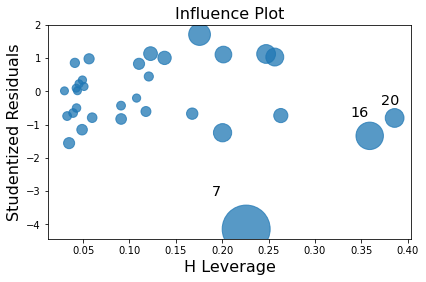

In [30]:
fig = sm.graphics.influence_plot(model_impr_infra, criterion="cooks")
fig.tight_layout(pad=1.0)

In [31]:
df_outlier = model_impr_infra.get_influence().summary_frame()
display(df_outlier[df_outlier['cooks_d'] > 0.15])

,dfb_Rural_Pop_Growth,dfb_Elec_Access,dfb_Urban_Pop_Growth,dfb_Agriculture_Land,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
7,-1.447447,-1.544034,-0.439088,-2.145580,0.794688,-3.301213,0.225816,-1.782906,-4.147937,-2.240200
16,-0.709008,-0.160596,0.780044,-0.061601,0.244670,-1.321979,0.358976,-0.989283,-1.340671,-1.003271


In [32]:
drop_arr = df_outlier[df_outlier['cooks_d']>0.15].index
df_train_infra.drop(index = drop_arr, inplace = True)
#display(df_train_infra)

C:\Users\mike9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### <u> Hypothesis Testing:</u>

In [33]:
model_hyp_infra = smf.ols('Unemployment ~  Rural_Pop_Growth + Elec_Access + Agriculture_Land + Urban_Pop_Growth -1', df_train_infra).fit()
print(model_hyp_infra.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              57.10
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.68e-12
Time:                        19:45:35   Log-Likelihood:                         -2.4540
No. Observations:                  30   AIC:                                      12.91
Df Residuals:                      26   BIC:                                      18.51
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

After conducting the hypothesis tests, the results are as follows:

##### Rural Population Growth: 

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.027, reject null hypothesis

##### Electricity Access:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.008, reject null hypothesis

##### Agricultural Land:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.000, reject null hypothesis

##### Urban Population Growth:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.344, fail to reject null hypothesis


It is determined that Rural Population Growth, Electricity Access and Agricultural Land are the best combination for improving our prediction accuracy. Using these explanatory variables, our final improved model, with the outlier data and collinear variables removed, is fitted to be used for predictions and ananlysis on test dataset.

Build final model

In [34]:
model_final_infra = smf.ols('Unemployment ~ Elec_Access + Agriculture_Land + Rural_Pop_Growth-1', df_train_infra).fit()
print(model_final_infra.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              76.03
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    2.75e-13
Time:                        19:45:35   Log-Likelihood:                         -2.9809
No. Observations:                  30   AIC:                                      11.96
Df Residuals:                      27   BIC:                                      16.17
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Perform in-sample and out-of-sample predictions



Mean Squared Error:  0.251733213081048


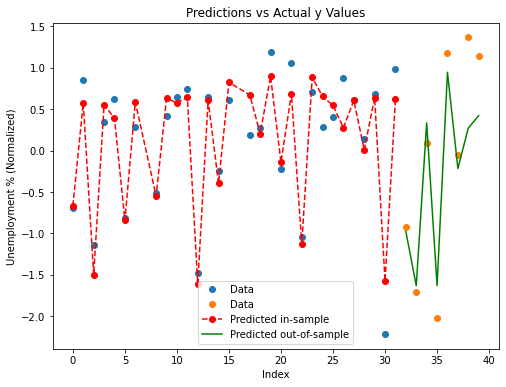

In [35]:
in_sample = model_final_infra.predict(df_train_infra)
out_sample = model_final_infra.predict(df_test_infra)
mse = 1/len(out_sample)*np.sum(np.square(out_sample - df_test_infra['Unemployment']))
print('\n')
print('Mean Squared Error: ',mse)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df_train_infra.index, df_train_infra['Unemployment'], 'o', label="Data")
ax.plot(df_test_infra.index, df_test_infra['Unemployment'], 'o', label="Data")
ax.plot(df_train_infra.index, in_sample, 'r--o', label="Predicted in-sample")
ax.plot(df_test_infra.index, out_sample, 'g-', label="Predicted out-of-sample")
legend = ax.legend(loc="best")
plt.title('Predictions vs Actual y Values')
plt.ylabel('Unemployment % (Normalized)')
plt.xlabel('Index')
plt.show()

### <u>Health Model</u>

Build Initial Model

In [36]:
model_init_health = smf.ols('Unemployment ~ S_Enrollment + Adol_Fert_Rate + S_Enrollment_GPI + Prev_HIV + Life_Expectancy', df_train_health).fit()
print(model_init_health.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     42.00
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.21e-11
Time:                        19:45:35   Log-Likelihood:                -7.1183
No. Observations:                  32   AIC:                             26.24
Df Residuals:                      26   BIC:                             35.03
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0652      0.060  

In order to find the best combination of features, we use our combination function to iterate through all the possible combinations, while recording the highest Adjusted R-squared score. We then create an improved model using these explanatory variables, and exclude the intercept as it already proved in the initial model to not show any significance with a high p-value of 0.281.

In [37]:
all_combs_health = combinations(df_train_health,'Unemployment')
#print(all_combs_health)
df_score_health = pd.DataFrame(data = all_combs_health,columns = ['Adj R-Squared', 'Combination'])
max_score_health = df_score_health[df_score_health['Adj R-Squared']==df_score_health['Adj R-Squared'].max()]
a_health = np.array(max_score_health['Combination'])
print(a_health)
print(max_score_health['Adj R-Squared'].iloc[0])

[('Adol_Fert_Rate', 'Life_Expectancy', 'S_Enrollment_GPI', 'S_Enrollment')]
0.8733240112052241


In [38]:
model_impr_health = smf.ols('Unemployment ~ S_Enrollment + Life_Expectancy + S_Enrollment_GPI + Adol_Fert_Rate -1', df_train_health).fit()
print(model_impr_health.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              53.76
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    9.71e-13
Time:                        19:45:36   Log-Likelihood:                         -7.8513
No. Observations:                  32   AIC:                                      23.70
Df Residuals:                      28   BIC:                                      29.57
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### <u>Influence and Outlier Detection</u>

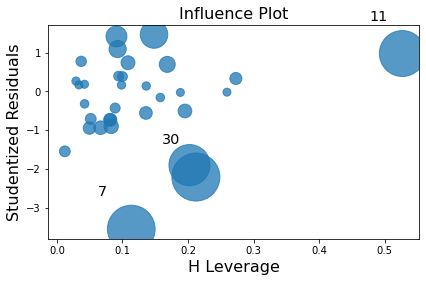

In [39]:
fig = sm.graphics.influence_plot(model_impr_health, criterion="cooks")
fig.tight_layout(pad=1.0)

In [40]:
df_outlier = model_impr_health.get_influence().summary_frame()
display(df_outlier[df_outlier['cooks_d'] > 0.15])

,dfb_S_Enrollment,dfb_Life_Expectancy,dfb_S_Enrollment_GPI,dfb_Adol_Fert_Rate,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
7,-1.172287,-0.502295,0.426114,-0.534566,0.285697,-2.988374,0.113449,-1.069013,-3.555869,-1.272020
11,0.342744,0.447111,-0.929299,0.134560,0.264699,0.975050,0.526890,1.028978,0.974161,1.028040
16,-0.492161,0.472168,0.364615,-0.943740,0.210320,-1.821475,0.202277,-0.917214,-1.905079,-0.959313
30,0.618851,0.502568,0.042903,-0.398448,0.289392,-2.074263,0.212004,-1.075904,-2.214089,-1.148430


In [41]:
drop_arr = df_outlier[df_outlier['cooks_d']>0.15].index
df_train_health.drop(index = drop_arr, inplace = True)
#display(df_train)

C:\Users\mike9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### <u> Hypothesis Testing:</u>

In [42]:
model_hyp_health = smf.ols('Unemployment ~ S_Enrollment + Life_Expectancy + S_Enrollment_GPI + Adol_Fert_Rate -1', df_train_health).fit()
print(model_hyp_health.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              69.23
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    7.98e-13
Time:                        19:45:36   Log-Likelihood:                          4.6146
No. Observations:                  28   AIC:                                     -1.229
Df Residuals:                      24   BIC:                                      4.100
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

After conducting the test, the results are as follows:

##### School Enrollment: 

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.269, fail to reject null hypothesis

##### Life Expectancy:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.013, reject null hypothesis

##### School Enrollment Gender Parity Index:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.042, reject null hypothesis

##### Adolescent Fertilization Rate:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.000, reject null hypothesis


It is determined that School Enrollment GPI, Life Expectancy and Adolescent Fertilization Rate are the best combination for improving our prediction accuracy. Using these explanatory variables, our final improved model, with the outlier data and collinear variables removed, is fitted to be used for predictions and ananlysis on test dataset.

Build Final model

In [43]:
model_final_health = smf.ols('Unemployment ~  S_Enrollment_GPI + Life_Expectancy + Adol_Fert_Rate -1', df_train_health).fit()
print(model_final_health.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              90.86
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.41e-13
Time:                        19:45:36   Log-Likelihood:                          3.8878
No. Observations:                  28   AIC:                                     -1.776
Df Residuals:                      25   BIC:                                      2.221
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Perform in-sample and out-of-sample predictions



Mean Squared Error:  0.43654614513037415


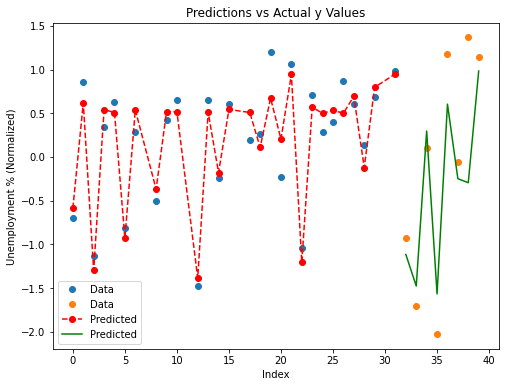

In [44]:
in_sample = model_final_health.predict(df_train_health)
out_sample = model_final_health.predict(df_test_health)
mse = 1/len(out_sample)*np.sum(np.square(out_sample - df_test_health['Unemployment']))
print('\n')
print('Mean Squared Error: ',mse)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df_train_health.index, df_train_health['Unemployment'], 'o', label="Data")
ax.plot(df_test_health.index, df_test_health['Unemployment'], 'o', label="Data")
ax.plot(df_train_health.index, in_sample, 'r--o', label="Predicted")
ax.plot(df_test_health.index, out_sample, 'g-', label="Predicted")
legend = ax.legend(loc="best")
plt.title('Predictions vs Actual y Values')
plt.ylabel('Unemployment % (Normalized)')
plt.xlabel('Index')
plt.show()

### <u>Economic Model</u>

Build Initial Model

In [45]:
model_init_eco = smf.ols('Unemployment ~ ST_Debt + Tot_Reserves + Current_Account_Balance + GDP_Growth + Inflation + Imports', df_train_eco).fit()
print(model_init_eco.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     16.10
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.66e-07
Time:                        19:45:37   Log-Likelihood:                -17.102
No. Observations:                  32   AIC:                             48.20
Df Residuals:                      25   BIC:                             58.46
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In order to find the best combination of features, we use our combination function to iterate through all the possible combinations, while recording the highest Adjusted R-squared score. We then create an improved model using these explanatory variables, and exclude the intercept as it already proved in the initial model to not show any significance with a high p-value of 0.62.

In [46]:
all_combs_eco = combinations(df_train_eco,'Unemployment')
#print(all_combs_eco)
df_score = pd.DataFrame(data = all_combs_eco,columns = ['Adj R-Squared', 'Combination'])
max_score = df_score[df_score['Adj R-Squared']==df_score['Adj R-Squared'].max()]
a = np.array(max_score['Combination'])
print(a)
print(max_score['Adj R-Squared'].iloc[0])

[('Inflation', 'Current_Account_Balance', 'GDP_Growth', 'Imports', 'Tot_Reserves')]
0.754040011386701


In [47]:
model_impr_eco = smf.ols('Unemployment ~ Tot_Reserves + Current_Account_Balance + GDP_Growth + Inflation + Imports -1', df_train_eco).fit()
print(model_impr_eco.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              20.61
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.87e-08
Time:                        19:45:37   Log-Likelihood:                         -17.273
No. Observations:                  32   AIC:                                      44.55
Df Residuals:                      27   BIC:                                      51.88
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### <u>Influence and Outlier Detection</u>

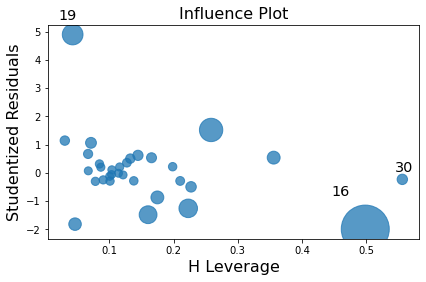

In [48]:
fig = sm.graphics.influence_plot(model_impr_eco, criterion="cooks")
fig.tight_layout(pad=1.0)

In [49]:
df_outlier = model_impr_eco.get_influence().summary_frame()
display(df_outlier[df_outlier['cooks_d'] > 0.15])

,dfb_Tot_Reserves,dfb_Current_Account_Balance,dfb_GDP_Growth,dfb_Inflation,dfb_Imports,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
16,-0.916933,-0.947826,-1.743186,-0.540433,0.605487,0.712761,-1.89286,0.498663,-1.887804,-1.994521,-1.989195
31,0.806669,-0.176012,0.102965,-0.095457,-0.729259,0.153079,1.48157,0.258541,0.874870,1.516839,0.895697


In [50]:
drop_arr = df_outlier[df_outlier['cooks_d']>0.15].index
df_train_eco.drop(index = drop_arr, inplace = True)
#display(df_train_eco)

C:\Users\mike9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### <u> Hypothesis Testing:</u>

In [51]:
model_hyp_eco = smf.ols('Unemployment ~  Tot_Reserves + Current_Account_Balance + GDP_Growth + Inflation + Imports  -1', df_train_eco).fit()
print(model_hyp_eco.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              17.71
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.65e-07
Time:                        19:45:38   Log-Likelihood:                         -13.904
No. Observations:                  30   AIC:                                      37.81
Df Residuals:                      25   BIC:                                      44.81
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

After conducting the test, the results are as follows:

##### Total Reserves:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.182, fail to reject null hypothesis

##### Current Account Balance: 

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.029, reject null hypothesis


##### GDP Growth:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.022, reject null hypothesis

##### Inflation:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.000, reject null hypothesis

##### Imports:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.062, fail to reject null hypothesis


It is determined that all of the variables besides imports and total reserves provide the best combination for improving our prediction accuracy. Using these explanatory variables, our final improved model, with the outlier data and collinear variables removed, is fitted to be used for predictions and ananlysis on test dataset.

Build final model

In [52]:
model_final_eco = smf.ols('Unemployment ~ Current_Account_Balance + GDP_Growth + Inflation  -1', df_train_eco).fit()
print(model_final_eco.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              22.91
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.39e-07
Time:                        19:45:38   Log-Likelihood:                         -17.622
No. Observations:                  30   AIC:                                      41.24
Df Residuals:                      27   BIC:                                      45.45
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Perform in-sample and out-of-sample predictions



Mean Squared Error:  0.6895526654968612


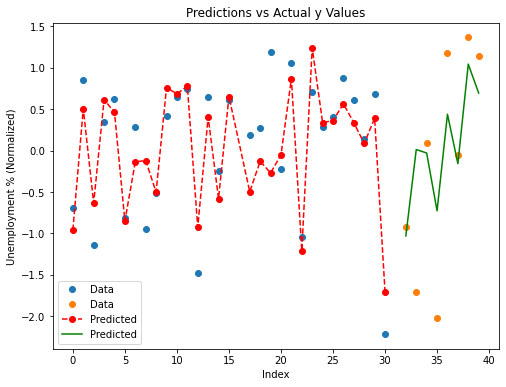

In [53]:
in_sample = model_final_eco.predict(df_train_eco)
out_sample = model_final_eco.predict(df_test_eco)
mse = 1/len(out_sample)*np.sum(np.square(out_sample - df_test_eco['Unemployment']))
print('\n')
print('Mean Squared Error: ',mse)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df_train_eco.index, df_train_eco['Unemployment'], 'o', label="Data")
ax.plot(df_test_eco.index, df_test_eco['Unemployment'], 'o', label="Data")
ax.plot(df_train_eco.index, in_sample, 'r--o', label="Predicted")
ax.plot(df_test_eco.index, out_sample, 'g-', label="Predicted")
legend = ax.legend(loc="best")
plt.title('Predictions vs Actual y Values')
plt.ylabel('Unemployment % (Normalized)')
plt.xlabel('Index')
plt.show()

### <u>Full Model</u>

Build Initial Model

In [54]:
model_initial = smf.ols('Unemployment ~ Imports + Inflation + S_Enrollment + Elec_Access + Urban_Pop_Growth + Arable_Land + Adol_Fert_Rate + S_Enrollment_GPI + Prev_HIV + Life_Expectancy  + ST_Debt + Current_Account_Balance + GDP_Growth', df_train).fit()
print(model_initial.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     54.85
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           9.43e-12
Time:                        19:45:39   Log-Likelihood:                 14.145
No. Observations:                  32   AIC:                           -0.2898
Df Residuals:                      18   BIC:                             20.23
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In order to find the best combination of features, we use our combination function to iterate through all the possible combinations, while recording the highest Adjusted R-squared score. We then create an improved model using these explanatory variables, and exclude the intercept as it already proved in the initial model to not show any significance with a high p-value of 0.62.

In [55]:
all_combs = combinations(df_train,'Unemployment')
df_score = pd.DataFrame(data = all_combs,columns = ['Adj R-Squared', 'Combination'])
max_score = df_score[df_score['Adj R-Squared']==df_score['Adj R-Squared'].max()]
a = np.array(max_score['Combination'])
print(a)
print(max_score['Adj R-Squared'].iloc[0])

[('Current_Account_Balance', 'Adol_Fert_Rate', 'GDP_Growth', 'Urban_Pop_Growth', 'Arable_Land', 'Agriculture_Land', 'S_Enrollment_GPI', 'Prev_HIV', 'Life_Expectancy')]
0.9651589424213038


In [56]:
model_impr = smf.ols('Unemployment ~ Life_Expectancy + Current_Account_Balance + Prev_HIV + Agriculture_Land + Adol_Fert_Rate + S_Enrollment_GPI + Arable_Land + GDP_Growth + Urban_Pop_Growth -1', df_train).fit()
print(model_impr.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              91.66
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    7.24e-16
Time:                        19:49:40   Log-Likelihood:                          12.593
No. Observations:                  32   AIC:                                     -7.186
Df Residuals:                      23   BIC:                                      6.006
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### <u>Influence and Outlier Detection</u>

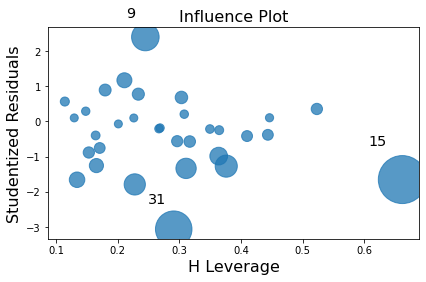

In [57]:
fig = sm.graphics.influence_plot(model_impr, criterion="cooks")
fig.tight_layout(pad=1.0)

In [58]:
df_outlier = model_impr.get_influence().summary_frame()
display(df_outlier[df_outlier['cooks_d'] > 0.15])

,dfb_Life_Expectancy,dfb_Current_Account_Balance,dfb_Prev_HIV,dfb_Agriculture_Land,dfb_Adol_Fert_Rate,dfb_S_Enrollment_GPI,dfb_Arable_Land,dfb_GDP_Growth,dfb_Urban_Pop_Growth,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
9,0.205844,-0.036480,0.232074,0.627480,0.723317,0.629014,-0.195083,-0.730881,-0.539606,0.171985,2.185692,0.244717,1.244132,2.401560,1.367008
15,-0.785019,-1.307953,0.930563,-0.417281,-0.852700,0.081012,0.807728,-0.990290,1.543606,0.553438,-1.595512,0.661779,-2.231803,-1.654697,-2.314591
31,1.049844,-0.235359,-0.058442,-0.370905,-0.147161,0.085526,0.553070,1.625996,0.010832,0.313708,-2.624350,0.290752,-1.680289,-3.066534,-1.963405


In [59]:
drop_arr = df_outlier[df_outlier['cooks_d']>0.15].index
df_train.drop(index = drop_arr, inplace = True)
#display(df_train)

C:\Users\mike9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### <u> Hypothesis Testing:</u>

In [60]:
model_hyp_impr = smf.ols('Unemployment ~  Life_Expectancy + Current_Account_Balance + Prev_HIV + Agriculture_Land + Adol_Fert_Rate + S_Enrollment_GPI + Arable_Land + GDP_Growth + Urban_Pop_Growth -1', df_train).fit()
print(model_hyp_impr.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              133.1
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    7.41e-16
Time:                        19:49:40   Log-Likelihood:                          20.540
No. Observations:                  29   AIC:                                     -23.08
Df Residuals:                      20   BIC:                                     -10.77
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

After conducting the test, the results are as follows:


##### Urban Population Growth:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.001, reject null hypothesis

##### Arable Land:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.020, reject null hypothesis

##### Adolescent Fertility Rate:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.000, reject null hypothesis

##### School Enrollment Gender Parity Index:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.258, fail to reject null hypothesis

##### Prevalent HIV:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.018, reject null hypothesis

##### Life Expectancy:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.589, fail to reject null hypothesis


##### Current Account Balance:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.002, reject null hypothesis

##### GDP Growth:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.046, reject null hypothesis

##### Agricultural Land:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Since P-value = 0.004, reject null hypothesis

It is determined that ... are the best combination for improving our prediction accuracy. Using these explanatory variables, our final improved model, with the outlier data and collinear variables removed, is fitted to be used for predictions and ananlysis on test dataset.

Build final model

In [61]:
model_final_impr = smf.ols('Unemployment ~ Current_Account_Balance + Prev_HIV + Agriculture_Land + Adol_Fert_Rate + Arable_Land + GDP_Growth + Urban_Pop_Growth -1', df_train).fit()
print(model_final_impr.summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              169.4
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                    1.23e-17
Time:                        19:49:40   Log-Likelihood:                          19.036
No. Observations:                  29   AIC:                                     -24.07
Df Residuals:                      22   BIC:                                     -14.50
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Perform in-sample and out-of-sample predictions



Mean Squared Error:  0.7868293048070432


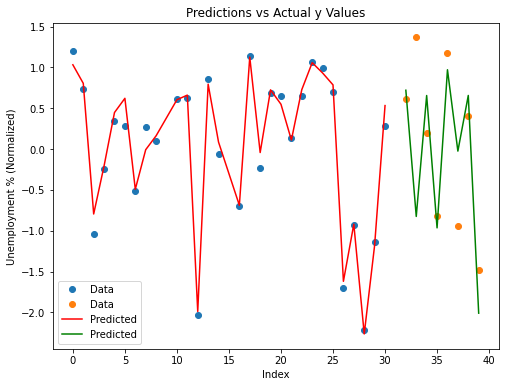

In [62]:
in_sample = model_final_impr.predict(df_train)
out_sample = model_final_impr.predict(df_test)
mse = 1/len(out_sample)*np.sum(np.square(out_sample - df_test['Unemployment']))
print('\n')
print('Mean Squared Error: ',mse)

fig, ax = plt.subplots(figsize=(8,6))


ax.plot(df_train.index, df_train['Unemployment'], 'o', label="Data")
ax.plot(df_test.index, df_test['Unemployment'], 'o', label="Data")
ax.plot(df_train.index, in_sample, 'r-', label="Predicted")
ax.plot(df_test.index, out_sample, 'g-', label="Predicted")
legend = ax.legend(loc="best")
plt.title('Predictions vs Actual y Values')
plt.ylabel('Unemployment % (Normalized)')
plt.xlabel('Index')
plt.show()

### For all 4 of the above models
#### Assumptions:
- There exist a linear relationship between our explanatory variables, x, and the response variable, y.
- The residuals are independent.

#### Appropriateness:
- We appropriately removed any collinear variables
- We plotted the residuals of our model against the fitted values to show independece

### <u>Risidual Analysis on Combined Model</u>
We want to ensure that residuals are randomly scattered for each explanatory variable.
Residuals appear to be uncorrelated to predictors. Any potential patterns can be attributed to sampling variation.

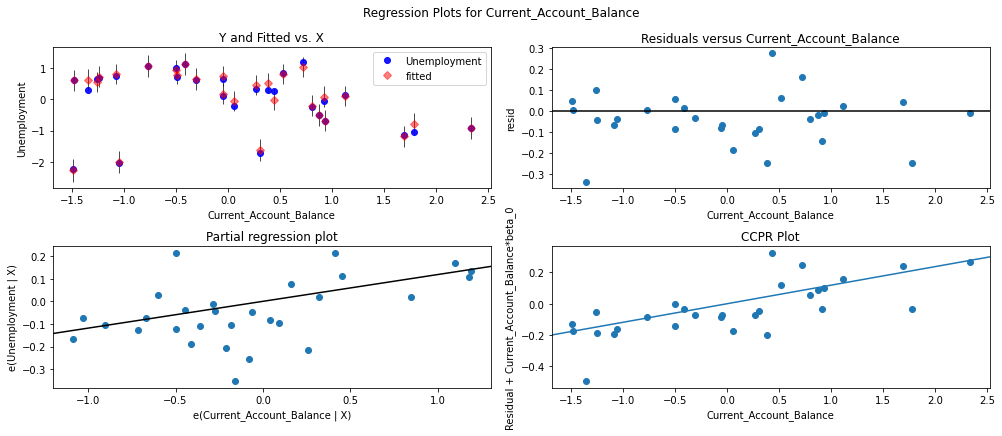

In [63]:
plt.rc("figure", figsize=(14,6))
fig = sm.graphics.plot_regress_exog(model_final_impr, "Current_Account_Balance")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

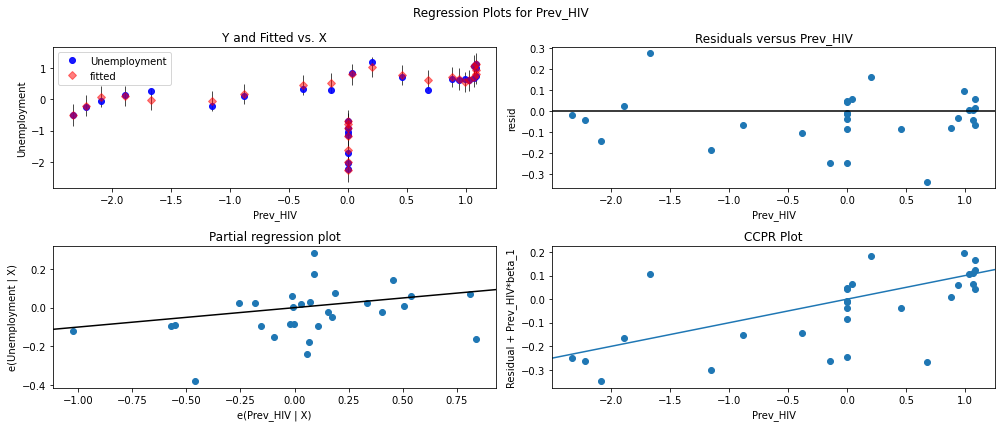

In [64]:
fig = sm.graphics.plot_regress_exog(model_final_impr, "Prev_HIV")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

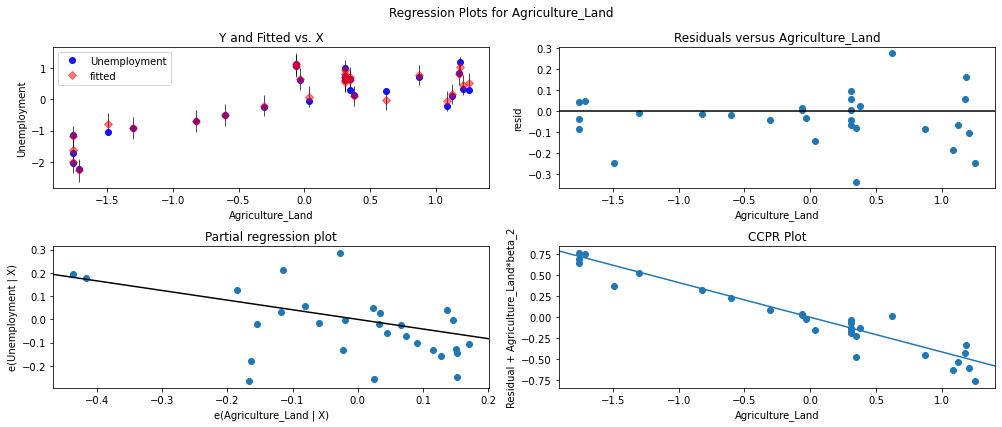

In [65]:
fig = sm.graphics.plot_regress_exog(model_final_impr, "Agriculture_Land")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

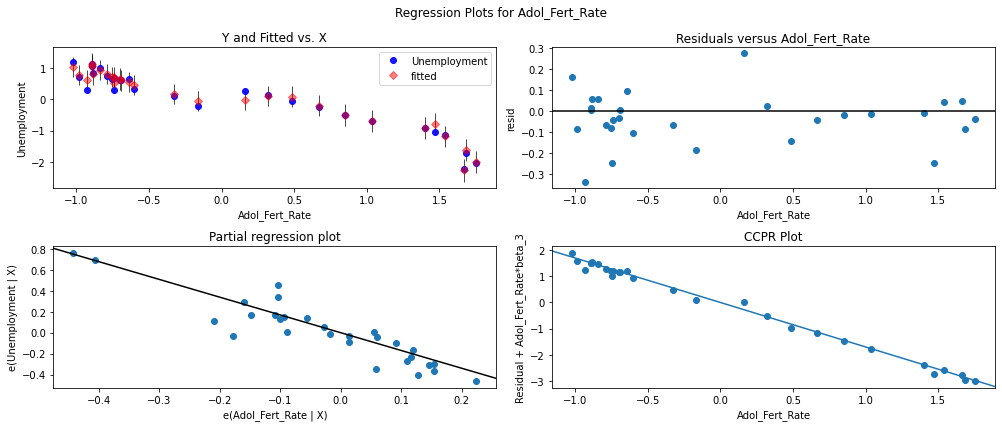

In [66]:
fig = sm.graphics.plot_regress_exog(model_final_impr, "Adol_Fert_Rate")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

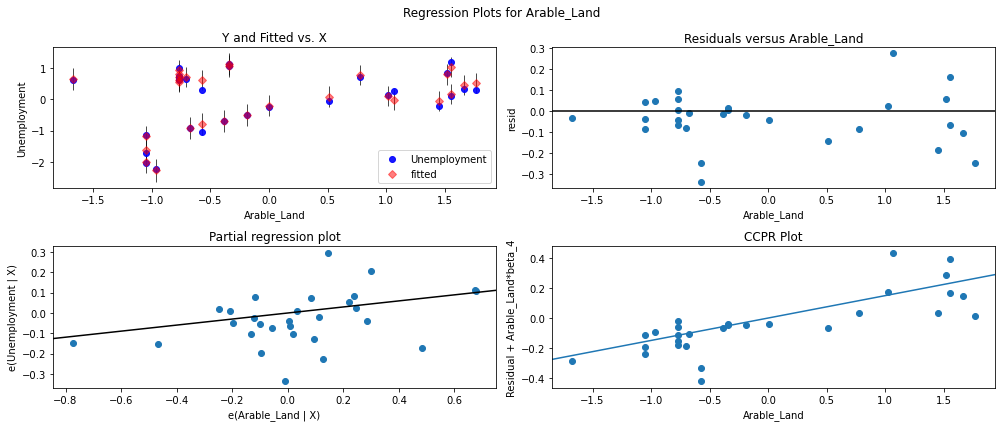

In [67]:
fig = sm.graphics.plot_regress_exog(model_final_impr, "Arable_Land")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

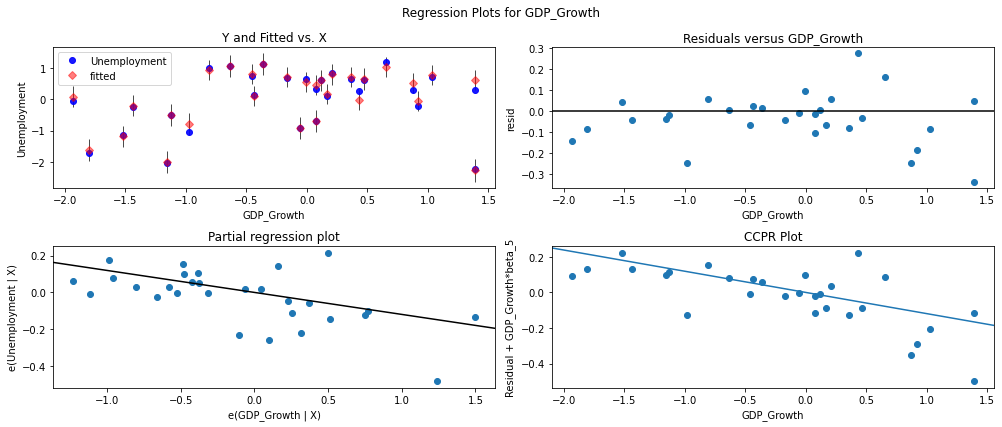

In [68]:
fig = sm.graphics.plot_regress_exog(model_final_impr, "GDP_Growth")
fig.tight_layout(pad=1.0)

In the above residual vs imports plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

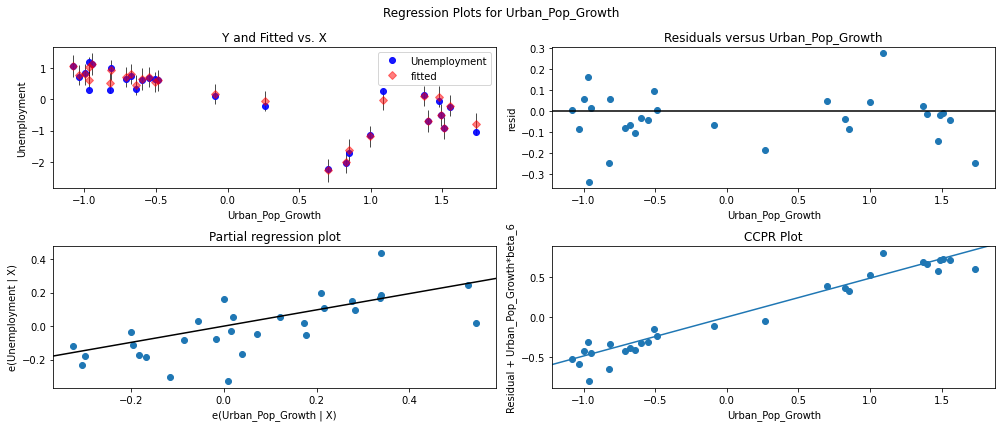

In [69]:
fig = sm.graphics.plot_regress_exog(model_final_impr, "Urban_Pop_Growth")
fig.tight_layout(pad=1.0)

In the above residual vs population plot, it is clear that there is no pattern between the explanantory variable included in the model, and the residuals. This shows that the residuals are independent. 

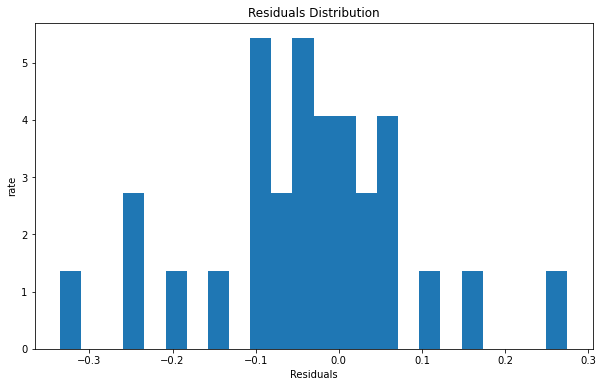

In [70]:
#plot the distribution of residuals
def plot_residuals(model):
    resid = pd.DataFrame(model.resid,columns = ['error'])
    plt.figure(figsize = (10,6))
    plt.hist(resid['error'],bins=24,density=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('rate')
    plt.show()
plot_residuals(model_final_impr)

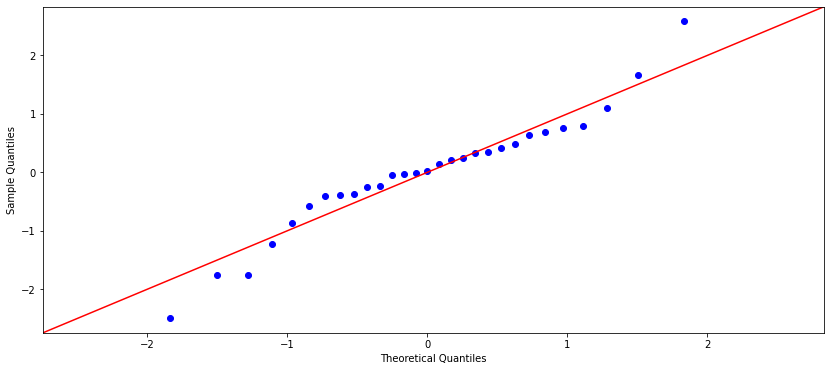

In [71]:
residuals = pd.DataFrame(model_final_impr.resid,columns = ['error'])
value = np.array(residuals.values).ravel()
sm.qqplot(value,fit=True, line='45')
plt.show()

From the QQ-plot of the residuals above we can see that residuals are not normally distributed. The QQ-plot also shows something we did not observe in the distribution plot. Residuals slightly deviate from the normal distribution at the beginning and the end (tails) of the plot. This is what we expected because the residuals have a kurtosis of 3.963 as observed in the summary of model_final. From this, we can conclude that residuals are normally distributed so the normality test does pass. This means we can proceed with the F test.

### <u>4. Interpretation of Results:</u>

#### <u>Interpretation of Economic Model Diagnostics</u>

The R-squared statistic is a measurement of how much the change in the unemployment rate is caused by the changes in GDP Growth and the inflation rate. From our initial model, this value has decreased from 79.4% to 71.8% indicating that our model tuning has resulted in a worse model fit. We can see that, due to the difference between R-squared and Adjusted R-squared, and the decrease in values from our initial model to this model, we can conclude that our chosen independent variables do not fully explain the change in unemployment rate. This could be due to the presence of only two variables after our model tuning.

The F-statistic determines if your group of explanatory variables are statistically significant by comparing the produced model to one where the effect of the variables is changed to 0. The probability of the F-statistic tells us the accuracy of the null hypothesis, where the effect of the variables has been set to 0. In our case, it tells us that there is a 1.39e-07 chance of the null hypothesis being true. Thus, we can reject the null hypothesis and conclude that our chosen explanatory variables are statistically significant.

The omnibus and Jarque-Bera are used to describe the normalcy of the distribution of our residuals using skew and kurtosis measurements.  The closer the probability of these variables is to 1, the more likely it is to indicate a normal distribution. With values of 78.5% and 75.4% respectively, we can conclude that our residuals are approximately normally distributed, thereby also satisfying our initial assumptions.

The Durbin-Watson measures how evenly distributed our errors are throughout the data. With a value of 1.895, we can conclude that our model is homoscedastic, and the relative error does not go higher as the data points go higher.

Condition number is a measure of the sensitivity within our model. We have a low condition number as we have normalized our data and our model is thus not overly sensitive to changes in the size of the dataset.

With these statistics considered, we can conclude that our economic model can represent changes in the unemployment rate, however, the lack of variables in the final model has led to an underrepresentation of the unemployment rate that is reflected in R-Squared of the model. There is definite room for exploration to consider other non-economic variables in the formulation of the model.
 

#### <u>Interpretation of Infrastructure Model Diagnostics</u>

From our initial model, this value has increased from 85.2% to 87.5% indicating that our model tuning has resulted in a better model fit. We can see that, due to the difference between R-squared and Adjusted R-squared, and the increase in values from our initial model to this model, we can conclude that our chosen independent variables do contribute to the change in unemployment rate.

In this model, the probability of the F-Statistic tells us that there is a 2.31e-13 chance of the null hypothesis being true. Thus, we can reject the null hypothesis and conclude that our chosen explanatory variables are statistically significant.

The omnibus and Jarque-Bera are used to describe the normalcy of the distribution of our residuals using skew and kurtosis measurements.  The closer the probability of these variables is to 1, the more likely it is to indicate a normal distribution. With values of 59.7% and 85% respectively, we can conclude that our residuals are approximately normally distributed, thereby also satisfying our initial assumptions.

The Durbin-Watson measures how evenly distributed our errors are throughout the data. With a value of 2.016, we can conclude that our model is homoscedastic, and the relative error does not go higher as the data points go higher.

Condition number is a measure of the sensitivity within our model. We have a low condition number as we have normalized our data and our model is thus not overly sensitive to changes in the size of the dataset.

Even though our final model only contains two variables, electricity access and agricultural land, the model does well in representing the unemployment rate. This highlights the statistical significance of these variables used in the model formulation.
 

#### <u>Interpretation of Health Model Diagnostics</u>

The R-Squared is 89% with our initial implementation which shows that the health indicators chosen describe the changes in the unemployment rate. After improvements, the R-Squared is 91.6%, where the model only uses life expectancy, school enrolment GPI and adolescent fertility rate.

In this model, the probability of the F-Statistic tells us that there is a 1.41e-13 chance of the null hypothesis being true. Thus, we can reject the null hypothesis and conclude that our chosen explanatory variables are statistically significant. 

The omnibus and Jarque-Bera are used to describe the normalcy of the distribution of our residuals using skew and kurtosis measurements.  The closer the probability of these variables is to 1, the more likely it is to indicate a normal distribution. With values of 90.5% and 95.3% respectively, we can conclude that our residuals are approximately normally distributed, thereby also satisfying our initial assumptions.

The Durbin-Watson measures how evenly distributed our errors are throughout the data. With a value of 2.664, we can conclude that our model is homoscedastic, and the relative error does not go higher as the data points go higher.

Condition number is a measure of the sensitivity within our model. We have a low condition number as we have normalized our data and our model is thus not overly sensitive to changes in the size of the dataset.

The final model includes the variables life expectancy, school enrolment GPI and adolescent fertility rate which performs well in describing the change in the unemployment rate. With the statistics considered, these three exploratory variables are statistically significant in modelling the unemployment rate.
 


#### <u>Interpretation of Full Model Diagnostics</u>

The R-Squared is 97.5% with our initial implementation which shows that the health indicators chosen describe the changes in the unemployment rate. After improvements, the R-Squared is 98.2%, where the model only uses life expectancy, school enrolment GPI and adolescent fertility rate.


In this model, the probability of the F-Statistic tells us that there is a 1.23e-17 chance of the null hypothesis being true. Thus, we can reject the null hypothesis and conclude that our chosen explanatory variables are statistically significant.

The omnibus and Jarque-Bera are used to describe the normalcy of the distribution of our residuals using skew and kurtosis measurements.  The closer the probability of these variables is to 1, the more likely it is to indicate a normal distribution. With values of 29.3% and 54.4% respectively, we can conclude that our residuals are approximately normally distributed.

The Durbin-Watson measures how evenly distributed our errors are throughout the data. With a value of 1.701, we can conclude that our model is homoscedastic, and the relative error does not go higher as the data points go higher.

Condition number is a measure of the sensitivity within our model. We have a low condition number as we have normalized our data and our model is thus not overly sensitive to changes in the size of the dataset.

The final model has achieved the greatest statistics by using seven exploratory variables from all three socioeconomic sectors. These variables are the most statistically significant out of all variables considered and provide the best describe the changes in the unemployment rate. With the statistics considered, these variables are the most successful in representing the changes in the unemployment rate of South Africa.

#### <u>Interpretation of the Results for the Four Models vs Expected Results</u>
As described in the hypothesis testing section for our economic model, GDP growth, inflation, and current account balance are the significant explanatory variables. Due to the high collinearity between GDP growth, imports, and exports, we can conclude that imports and exports will have a similar influence on the unemployment rate as GDP growth. However, if these were included in our model for prediction, they would have resulted in overfitting the model. Each could also replace GDP growth, and a similar result would be expected. This is shown by our model failing to reject the null hypothesis for imports, as it is highly correlated with GDO growth, and could replace it. Similarly, the total reserves of a country is closely linked with current account balance, and the model failed to reject the null hypothesis because of it.

The imports, exports and GDP of a country is representative of a countries wealth, job security and availability, and a countries general well-being as compared with the world. If a country is performing well economically, the GDP will increase, thus allowing for more trades of imports and exports. Through more trading and better economic performance, subsequently more jobs will become available to the population of south africa, thus descresing the unemployment rate. Our model does accurately represents this expectation, as a coefficient value of -0.3271 was produced, highlighting the negative relationship imports, exports, and GDP have on the unemployment rate. Which may be described as - if the GDP, imports, and exports of South Africa descreases, the unemployment rate will rise. We can see this relationship in the data where in 1992, the unemployment rate is at 21.2% and the GDP growth is at -2%, and in 1995, the unemployment rate is at 16.5% where the GDP is almost 2.5%. The same trends in imports and exports can be seen. This confirms the relationship that is described by our model. The current account balance also had an effect, which is what we expected since the current account balance is the countries trade balance in terms of imports and exports of goods and services, which is shown as significant due to its high collinearity with GDP growth.


In the hypothesis testing section of our health model, it was determined that life expectancy, school enrollment, and adolescent fertillity rate play a significant role in representing the unemployment rate. This iswhat we expected, as the an improved life expectancy nautrally comes with having a job and being able to pruchase necessities as well as luxuries. This is represented in the model with a coefficient value of 0.0917. We further expect school enrollment GPI to play a significant role, as the more people of the population educated will assist in them finding jobs, thus decreasing the unemployment rate. We expect this to have a more significant role than life expectancy, as life expectancy is largely subjective. This is represented in our model with a higher positive coefficient value of 0.1572. Just our normal school enrollment feature without the gender parity index was probably excluded by the model, due to its relationship with the school enrollment gender parity index feature. Adolescent fertility rate is also representative in our model of the unemployment rate. The more adolescents that become pregnant, the less chance they have of completing their schooling education, as well as pursuing further education and careers. Adolescents largely rely on their parents for support, thus increasing the unemployment rate. This negative relationship is seen in our model with a coefficient value of -0.889. This model is unique in showing the intricacies between the explanantory variables, and how they are collectively related, and affect the representation of our model.


For our infrastructure model, significant variables were identified to be electricity access, agricultural land, and rural population growth. An increase in rural population growth is naturally to be expected, as this increase leads to more informal settlements, generally started by the unemployed looking for a place to settle. This might not be true for the entire rural population, but for the large part of the population it is so. This increase in rural population is shown to have a negative effect on the unemployment rate with the negative coefficient value of -0.2897. Electricity bills are not cheap and require a stable income to be maintained on a regular basis. This direct linear relationship is expected for this reasin, and is shown with a coefficient of 0.212. The more land used for agriculture, the more people need to be employed to grow and maintain the crops on that land. This has a very high linear relationship, seen by a coefficient valye of 0.6111. Urban population growth, in a similar veign to our other models, failed to reject the null hypothesis as it is similar to rural population development.

Our final model was built to include features from all the above model, to determine relationships between these distinct sectors more holistically. In our hypotheses testing section for this model, a number of explanatory variables were found to have a significant effect on the response. These features are namely current account balance, prevalent HIV status, agricultural land, adolescent fertility rate, arable land, gdo growth, and urban population growth. This is great, as we can see a number of our significant explanatory variables for our other models, featuring here as well. Thus these variables are expected as described above and this model serves as a type of "extra" confirmation for our other models. Not included in the other models were arable land, and prevalent HIV status. These are, however, to be expected as having a sifnificant effect on the unemployment rate. Prevalent HIV status was potentially not included in our health model, as its collective relationship with the other explanatory variables within that model was not significant enough to be included. With a greater number of variables though, its signifance is realized and therefore included. This was not expected, as having a positive HIV status should not affect your employment status and is thus surprising. Arable land though is expected, as it is similar to agricultural land, and the more space used for farming, the more people need to be employed.

### <u>Conclusion</u>

Through the process of cleaning the data, performing exploratory analysis, and modelling, we split our initial 25 explanatory variables into 4 seperate model, namely an infrastructure model, a health model, an economic model, and finally a combined model. Answering research questions, each one of these models was successfully able to represent the change in unemployment to varying degrees. Through the implementation of the models, we can conclude that the unemployment rate can be modelled using factors from each of the selected sectors. While each of the models made with individual sectors had good results, the model which used a combination from all sectors was the most successful in representing the relationship with the response. This is largely due to the number of explanatory variables, as more variables allows the model to more fully describe the change. The final improved model consisted of the relevant explanatory variables current account balance, prevalence of HIV, agricultural land, adolescent fertility rate, arable land, GDP growth, urban population growth. Through this investigation it can finally be concluded, and our main research question can be answered, that the chosen socioeconomic factors are able to respresent the change in the unemployment rate of South Africa.

#### <u>Next Steps:</u>
The next steps of the investigation would involve obtaining validation data for the other explanatory variables initially decided upon, so that they may be included in the model. Through this a more accurate representation of the real-world model may be investigated. Inluded in the next steps is obtaining more data for the years prior to 1980.

#### <u>Short comings:</u>

The data that was used in this research has a lot of unspecified values, almost all the variables have at least one unspecified value. We tried to fill in the missing values in columns with the mean but this had a negative effect on the distribution of the some of the data. The distribution of some variables changed completely has a result of this. We realized that there ae outliers in the data, these observations were removed from the dataset for improved accuracy..<br>

The solution to this problem was to fill in the missing values in columns with the mean. We were able to get a good enough model by keeping these values but they also distorted our model. This is because some of the variables were dominated by these unspecified categories which mean the average, median, and mode for these variables changed.

#### <u>Future considerations:</u>

From our domain knowledge, we believe that they are variables that determine the other underlying factors influencing the unemployment rate in South Africa that were not part of this data. The example of such variables are, corruption and failure to redress the injustices of Apartheid.We believe that these variable are some of the key determinants of the other underlying factors influencing the unemployment rate in South Africa. For future considerations, we will advise including this variable in the data collection process.